In [ ]:
# import pickle
# def import_model(location_model):
#   with open(location_model, 'rb') as file:
#     model = pickle.load(file)

#   # evaluate model
#   y_pred_model = model.predict(X_test_scalar)
#   # check results
#   # mse
#   mse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=True))
#   # rmse
#   rmse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=False))
#   #r2
#   r2_metric = r2_score(y_test, y_pred_model)
#   # mae
#   mae_metric = mean_absolute_error(y_test, y_pred_model)
#   print("mse_metric","==",mse_metric)
#   print("rmse_metric","==",rmse_metric)
#   print("r2_metric","==",r2_metric)
#   print("mae_metric","==",mae_metric)

# #   print(classification_report(y_test, y_predict))
# import_model("/content/gdrive/MyDrive/test/test_third/test_savev2.pkl")

In [ ]:
# randm_src = RandomizedSearchCV(estimator=model, param_distributions = parameters,
#                             cv = 2, n_iter = 10, n_jobs=-1)
# randm_src.fit(X_train_scalar, y_train)

# print(" Results from Random Search " )
# print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
# print("\n The best score across ALL searched params:\n", randm_src.best_score_)
# print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
# from feature_engine.imputation import CategoricalImputer

# delete outlier
from sklearn.neighbors import LocalOutlierFactor

# train and tuning parameter
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score

# model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

# processing data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn import model_selection

# metrics
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error



# skip warning
import warnings
warnings.filterwarnings( action= 'ignore')

import pickle


# Import File

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/test/test_third/Full Dataset Australian Vehicle Prices Assessment 2 2023 T3.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,Toyota,2014.0,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500
16730,Mercedes-Benz,2012.0,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,-,117432,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888
16731,Suzuki,2022.0,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280
16732,Mercedes-Benz,2016.0,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888


# Data Preprocessing

## clean null all column in each records

In [ ]:
# df[98:2393]



In [ ]:
# list_drop_record = [i for i in range(99,2392)]
# df = df.drop(list_drop_record, axis=0).reset_index()
# del df['index']
# df.info()
# df


In [ ]:
# Brand clean
# Year convert float to integer
# Model clean
# Car/Suv clean nan value
# Title clean
# UsedOrNew clean
# Transmission clean '-'(text ok)
# Engine clean text to number and '-'
# DriveType clean
# FuelType clean '-'(text ok)
# FuelConsumption clean text to number and '-'
# Kilometres clean '-' and object to integer
# ColourExtInt clean text so much
# Location clean text so much
# CylindersinEngine clean '-' <<delete when duplicate
# clean nan value
# Doors clean nan value
# Seats clean nan value
# clean price



## delete useless record

In [ ]:
# These record data hardly reveal any important information.
df[(df['Car/Suv'].notna()) & (df['BodyType'].isna())]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
12,Honda,2015.0,City,USED Dealer ad,2015 Honda City GM VTi-L Sedan 4dr CVT 7sp 1.5...,USED,Automatic,-,Other,Unleaded,-,181745,Black / -,"Rouse Hill, NSW",-,NaN,NaN,NaN,11999
13,Toyota,2017.0,HiAce,USED Dealer ad,2017 Toyota HiAce,USED,Automatic,-,Other,-,-,136296,Silver / Grey,"Lidcombe, NSW",-,NaN,NaN,NaN,38999
27,BMW,2013.0,3,USED Dealer ad,2013 BMW 3 Series 28i,USED,Automatic,-,Other,Unleaded,-,143119,Black / -,"Rouse Hill, NSW",-,NaN,NaN,NaN,21999
97,Mercedes-Benz,2012.0,C-CLASS,USED Dealer ad,2012 Mercedes-Benz C-CLASS W204 BlueEFFICIENCY...,USED,Automatic,-,Other,Unleaded,-,162775,Black / -,"Rouse Hill, NSW",-,NaN,NaN,NaN,16999
99,Subaru,2007.0,Impreza,USED Dealer ad,2007 Subaru Impreza WRX STI,USED,Manual,-,Other,Unleaded,-,146077,Black / Grey/Black,"Smeaton Grange, NSW",-,NaN,NaN,NaN,34888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16595,Toyota,2009.0,Crown,03 **** ****\n,2009 Toyota Crown Hybrid,USED,-,-,Other,-,-,37788,Silver / -,"Moorabbin, VIC",-,NaN,NaN,NaN,29950
16601,Toyota,2009.0,Crown,03 **** ****\n,2009 Toyota Crown Hybrid,USED,-,-,Other,-,-,102891,Silver / -,"Moorabbin, VIC",-,NaN,NaN,NaN,29950
16607,Packard,1940.0,120,USED Dealer ad,1940 Packard 120,USED,Manual,-,Other,Unleaded,-,12000,Red / -,"Laverton North, VIC",-,NaN,NaN,NaN,64990
16712,Nissan,2010.0,Elgrand,USED Dealer ad,2010 Nissan Elgrand,USED,Automatic,-,Other,-,-,132000,White / -,"Slacks Creek, QLD",-,NaN,NaN,NaN,19000


In [ ]:
df[(df['Car/Suv'].notna()) & (df['BodyType'].isna())]['Car/Suv'].unique().tolist()

['USED Dealer ad',
 '02 **** ****\n',
 '03 **** ****\n',
 '08 **** ****\n',
 '07 **** ****\n']

In [ ]:
# List of values to remove
values_to_remove = ['USED Dealer ad', '02 **** ****\n', '08 **** ****\n', '03 **** ****\n', '07 **** ****\n']

# Create a mask for rows to keep
mask = ~df['Car/Suv'].isin(values_to_remove)

# Filter the DataFrame
df = df[mask]
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16321 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16320 non-null  object 
 1   Year               16320 non-null  float64
 2   Model              16320 non-null  object 
 3   Car/Suv            16293 non-null  object 
 4   Title              16320 non-null  object 
 5   UsedOrNew          16320 non-null  object 
 6   Transmission       16320 non-null  object 
 7   Engine             16320 non-null  object 
 8   DriveType          16320 non-null  object 
 9   FuelType           16320 non-null  object 
 10  FuelConsumption    16320 non-null  object 
 11  Kilometres         16320 non-null  object 
 12  ColourExtInt       16320 non-null  object 
 13  Location           15871 non-null  object 
 14  CylindersinEngine  16320 non-null  object 
 15  BodyType           16306 non-null  object 
 16  Doors              151

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16728,Nissan,2021.0,Qashqai,SUV,2021 Nissan Qashqai TI,USED,Automatic,"4 cyl, 2 L",Front,Unleaded,6.9 L / 100 km,32977,White / -,"Rocklea, QLD",4 cyl,SUV,4 Doors,5 Seats,36770
16729,Toyota,2014.0,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500
16731,Suzuki,2022.0,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280
16732,Mercedes-Benz,2016.0,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888


In [ ]:
useless_record = df[df['Car/Suv'].isna() & df['BodyType'].isna()]
useless_record

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
2391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15266,Toyota,2011.0,Hiace,NaN,2011 Toyota Hiace,USED,-,-,Other,-,-,-,- / -,"West Ryde, NSW",-,NaN,NaN,NaN,POA
15338,LDV,2023.0,Mifa,NaN,2023 LDV Mifa G9023,NEW,-,-,Other,-,-,-,Black / -,"Brookvale, NSW",-,NaN,NaN,NaN,53990
15341,LDV,2022.0,Deliver,NaN,2022 LDV Deliver 9 DEL921,NEW,-,-,Other,-,-,-,White / -,"Brookvale, NSW",-,NaN,NaN,NaN,47358
15343,LDV,2022.0,D90,NaN,2022 LDV D90 D9021,NEW,-,-,Other,-,-,-,White / -,"Brookvale, NSW",-,NaN,NaN,NaN,46990
15347,LDV,2023.0,Deliver,NaN,2023 LDV Deliver 9 DEL921,NEW,-,-,Other,-,-,-,White / -,"Brookvale, NSW",-,NaN,NaN,NaN,52542
15351,LDV,2000.0,Mifa,NaN,2000 LDV Mifa G9023,NEW,-,-,Other,-,-,-,White / -,"Brookvale, NSW",-,NaN,NaN,NaN,63990
15357,LDV,2022.0,D90,NaN,2022 LDV D90 D9021,NEW,-,-,Other,-,-,10,Grey / -,"Brookvale, NSW",-,NaN,NaN,NaN,39490
15360,LDV,2022.0,D90,NaN,2022 LDV D90 D9021,DEMO,-,-,Other,-,-,15,White / -,"Brookvale, NSW",-,NaN,NaN,NaN,49990
15791,LDV,2022.0,T60,NaN,2022 LDV T60 Max SK8C23,NEW,-,-,Other,-,-,-,Grey / -,"Brookvale, NSW",-,NaN,NaN,NaN,43148


In [ ]:
df = df[~((df['Car/Suv'].isna()) & (df['BodyType'].isna()))] # delete useless record
df = df.reset_index()
del df['index']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16306 non-null  object 
 1   Year               16306 non-null  float64
 2   Model              16306 non-null  object 
 3   Car/Suv            16293 non-null  object 
 4   Title              16306 non-null  object 
 5   UsedOrNew          16306 non-null  object 
 6   Transmission       16306 non-null  object 
 7   Engine             16306 non-null  object 
 8   DriveType          16306 non-null  object 
 9   FuelType           16306 non-null  object 
 10  FuelConsumption    16306 non-null  object 
 11  Kilometres         16306 non-null  object 
 12  ColourExtInt       16306 non-null  object 
 13  Location           15857 non-null  object 
 14  CylindersinEngine  16306 non-null  object 
 15  BodyType           16306 non-null  object 
 16  Doors              151

## change float to integer

In [ ]:
df['Year'] = df['Year'].map(lambda x : int(x))

## clean Car/Suv

In [ ]:
df[df['Car/Suv'].isna()]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
14493,Mini,2023,Countryman,NaN,2023 Mini Countryman Cooper Mini Yours,NEW,-,"3 cyl, 1.5 L",Front,Premium,6.3 L / 100 km,- / -,5 years / Unlimited km,NaN,3 cyl,SUV,5 Doors,5 Seats,56600
14604,Citroen,2023,C5,NaN,2023 Citroen C5 Aircross Sport 1.6 THP 133,NEW,-,"4 cyl, 1.6 L",Front,-,5.7 L / 100 km,- / -,5 years / Unlimited km,NaN,4 cyl,SUV,5 Doors,5 Seats,54990
14647,Mini,2023,Convertible,NaN,2023 Mini Convertible Cooper Classic,NEW,-,"3 cyl, 1.5 L",Front,Premium,6 L / 100 km,- / -,5 years / Unlimited km,NaN,3 cyl,Convertible,2 Doors,4 Seats,43680
14682,Audi,2023,A4,NaN,2023 Audi A4 Allroad 40 TDI Quattro,NEW,-,2 L,AWD,Diesel,4.9 L / 100 km,- / -,5 years / Unlimited km,NaN,2 L,Wagon,4 Doors,5 Seats,78000
14703,Porsche,2023,Taycan,NaN,2023 Porsche Taycan 4S Cross Turismo,NEW,-,0 L,AWD,Electric,0 L / 100 km,- / -,3 years / Unlimited km,NaN,0 L,Wagon,4 Doors,4 Seats,209600
14705,Porsche,2023,Taycan,NaN,2023 Porsche Taycan Turbo S,NEW,-,0 L,AWD,Electric,0 L / 100 km,- / -,3 years / Unlimited km,NaN,0 L,Sedan,4 Doors,4 Seats,352600
14712,Mini,2023,Countryman,NaN,2023 Mini Countryman Cooper S JCW Sport,NEW,-,"4 cyl, 2 L",Front,Premium,6.7 L / 100 km,- / -,5 years / Unlimited km,NaN,4 cyl,SUV,5 Doors,5 Seats,61900
14756,Lexus,2023,LS500H,NaN,2023 Lexus LS500H (hybrid) Sports LUX Black Tr...,NEW,-,"6 cyl, 3.5 L",Rear,Hybrid,6.6 L / 100 km,- / -,"4 years / 100,000 km",NaN,6 cyl,Sedan,4 Doors,5 Seats,201040
14762,Lexus,2023,ES300H,NaN,2023 Lexus ES300H F Sport (hybrid),NEW,-,"4 cyl, 2.5 L",Front,Hybrid,4.8 L / 100 km,- / -,"4 years / 100,000 km",NaN,4 cyl,Sedan,4 Doors,5 Seats,73290
14777,Peugeot,2023,Expert,NaN,2023 Peugeot Expert PRO Long,NEW,-,"4 cyl, 2 L",Front,Diesel,6.3 L / 100 km,- / -,"5 years / 200,000 km",NaN,4 cyl,Commercial,4 Doors,3 Seats,50075


In [ ]:
# it can be seen that Car/Suv column and BodyType column equal around 80 percent. so we can use instead in nan values
df[['Car/Suv','BodyType']]

,Car/Suv,BodyType
0,Sutherland Isuzu Ute,SUV
1,Hatchback,Hatchback
2,Coupe,Coupe
3,Coupe,Coupe
4,SUV,SUV
...,...,...
16301,SUV,SUV
16302,SYC Cars,Commercial
16303,Bremer Suzuki - New,SUV
16304,SUV,SUV


In [ ]:
temp_point = 0
for i in range(len(df)):
  try:
    if df['Car/Suv'][i] == df['BodyType'][i]:
      temp_point += 1
  except:
    pass
print(len(df))
print(temp_point)
print("similar around", (temp_point/len(df)*100))


16306
13520
similar around 82.91426468784496


In [ ]:
df[df['Location'].isna()]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
14414,Renault,2023,Arkana,NEW Available to order,2023 Renault Arkana ZEN,NEW,Automatic,"4 cyl, 1.3 L",Front,-,6 L / 100 km,- / -,5 years / Unlimited km,NaN,4 cyl,SUV,4 Doors,5 Seats,37500
14416,Toyota,2023,HiAce,NEW Available to order,2023 Toyota HiAce Slwb Commuter (12 Seats),NEW,Automatic,"4 cyl, 2.8 L",Rear,Diesel,0 L / 100 km,- / -,5 years / Unlimited km,NaN,4 cyl,People Mover,3 Doors,12 Seats,69760
14418,Land,2023,Rover,NEW Available to order,2023 Land Rover Defender 90 D250 S (183KW),NEW,Automatic,"6 cyl, 3 L",AWD,Diesel,7.9 L / 100 km,- / -,5 years / Unlimited km,NaN,6 cyl,SUV,3 Doors,5 Seats,97700
14420,Mazda,2023,6,NEW Available to order,2023 Mazda 6 G25 Sport,NEW,Automatic,"4 cyl, 2.5 L",Front,Unleaded,7 L / 100 km,- / -,5 years / Unlimited km,NaN,4 cyl,Wagon,4 Doors,5 Seats,36840
14422,Land,2023,Rover,NEW Available to order,2023 Land Rover Defender 130 P500 V8 (368KW),NEW,Automatic,"8 cyl, 5 L",AWD,-,12.7 L / 100 km,- / -,5 years / Unlimited km,NaN,8 cyl,SUV,5 Doors,8 Seats,237900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15137,Iveco,2023,Daily,NEW Available to order,2023 Iveco Daily E6 50C18 DRW (WB4350),NEW,Automatic,"4 cyl, 3 L",Rear,Diesel,0 L / 100 km,- / -,"3 years / 200,000 km",NaN,4 cyl,Ute / Tray,2 Doors,3 Seats,71559
15140,Iveco,2023,Daily,NEW Available to order,2023 Iveco Daily E6 35S18V H2 SRW (WB3520L),NEW,Manual,"4 cyl, 3 L",Rear,Diesel,0 L / 100 km,- / -,"3 years / 200,000 km",NaN,4 cyl,Commercial,3 Doors,3 Seats,70202
15142,Iveco,2023,Daily,NEW Available to order,2023 Iveco Daily E6 50C18 DRW (WB3450),NEW,Automatic,"4 cyl, 3 L",Rear,Diesel,0 L / 100 km,- / -,"3 years / 200,000 km",NaN,4 cyl,Ute / Tray,4 Doors,6 Seats,75789
15145,Iveco,2023,Daily,NEW Available to order,2023 Iveco Daily E6 70C21 DRW (WB3750),NEW,Automatic,"4 cyl, 3 L",Rear,Diesel,0 L / 100 km,- / -,"3 years / 200,000 km",NaN,4 cyl,Ute / Tray,2 Doors,3 Seats,83909


In [ ]:
for i in range(len(df)):
  if (pd.isna(df['Car/Suv'][i])):
    df['Car/Suv'][i] = df['BodyType'][i]
  elif "NEW Available to order":
    df['Car/Suv'][i] = df['BodyType'][i]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              16306 non-null  object
 1   Year               16306 non-null  int64 
 2   Model              16306 non-null  object
 3   Car/Suv            16306 non-null  object
 4   Title              16306 non-null  object
 5   UsedOrNew          16306 non-null  object
 6   Transmission       16306 non-null  object
 7   Engine             16306 non-null  object
 8   DriveType          16306 non-null  object
 9   FuelType           16306 non-null  object
 10  FuelConsumption    16306 non-null  object
 11  Kilometres         16306 non-null  object
 12  ColourExtInt       16306 non-null  object
 13  Location           15857 non-null  object
 14  CylindersinEngine  16306 non-null  object
 15  BodyType           16306 non-null  object
 16  Doors              15129 non-null  objec

In [ ]:
df['Car/Suv'].unique()

array(['SUV', 'Hatchback', 'Coupe', 'Commercial', 'Wagon', 'Ute / Tray',
       'Sedan', 'People Mover', 'Convertible', 'Other'], dtype=object)

## clean location

In [ ]:
# unknown location == new car
df[df['Location'].isna()]['UsedOrNew'].unique()

array(['NEW'], dtype=object)

In [ ]:
for i in range(len(df)):
  if (pd.isna(df['Location'][i])):
    df['Location'][i] = 'unknown province, unknown state'
    # print('test')
df[df['Location'] == "unknown province, unknown state"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              16306 non-null  object
 1   Year               16306 non-null  int64 
 2   Model              16306 non-null  object
 3   Car/Suv            16306 non-null  object
 4   Title              16306 non-null  object
 5   UsedOrNew          16306 non-null  object
 6   Transmission       16306 non-null  object
 7   Engine             16306 non-null  object
 8   DriveType          16306 non-null  object
 9   FuelType           16306 non-null  object
 10  FuelConsumption    16306 non-null  object
 11  Kilometres         16306 non-null  object
 12  ColourExtInt       16306 non-null  object
 13  Location           16306 non-null  object
 14  CylindersinEngine  16306 non-null  object
 15  BodyType           16306 non-null  object
 16  Doors              15129 non-null  objec

## clean object to integer

In [ ]:
# Price
list_price = df['Price'].tolist()
temp_price = []
for i in range(len(list_price)):
  try:
    temp_price.append(int(list_price[i]))
  except:
    temp_price.append(np.nan)
    # print(test)
# temp_price
df['Price'] = temp_price

# Doors
df['Doors'] = df['Doors'].map(lambda x : x if (pd.isna(x)) else int(x.split(" ")[1]))
# Seats
df['Seats'] = df['Seats'].map(lambda x : x if (pd.isna(x)) else int(x.split(" ")[1]))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16306 non-null  object 
 1   Year               16306 non-null  int64  
 2   Model              16306 non-null  object 
 3   Car/Suv            16306 non-null  object 
 4   Title              16306 non-null  object 
 5   UsedOrNew          16306 non-null  object 
 6   Transmission       16306 non-null  object 
 7   Engine             16306 non-null  object 
 8   DriveType          16306 non-null  object 
 9   FuelType           16306 non-null  object 
 10  FuelConsumption    16306 non-null  object 
 11  Kilometres         16306 non-null  object 
 12  ColourExtInt       16306 non-null  object 
 13  Location           16306 non-null  object 
 14  CylindersinEngine  16306 non-null  object 
 15  BodyType           16306 non-null  object 
 16  Doors              151

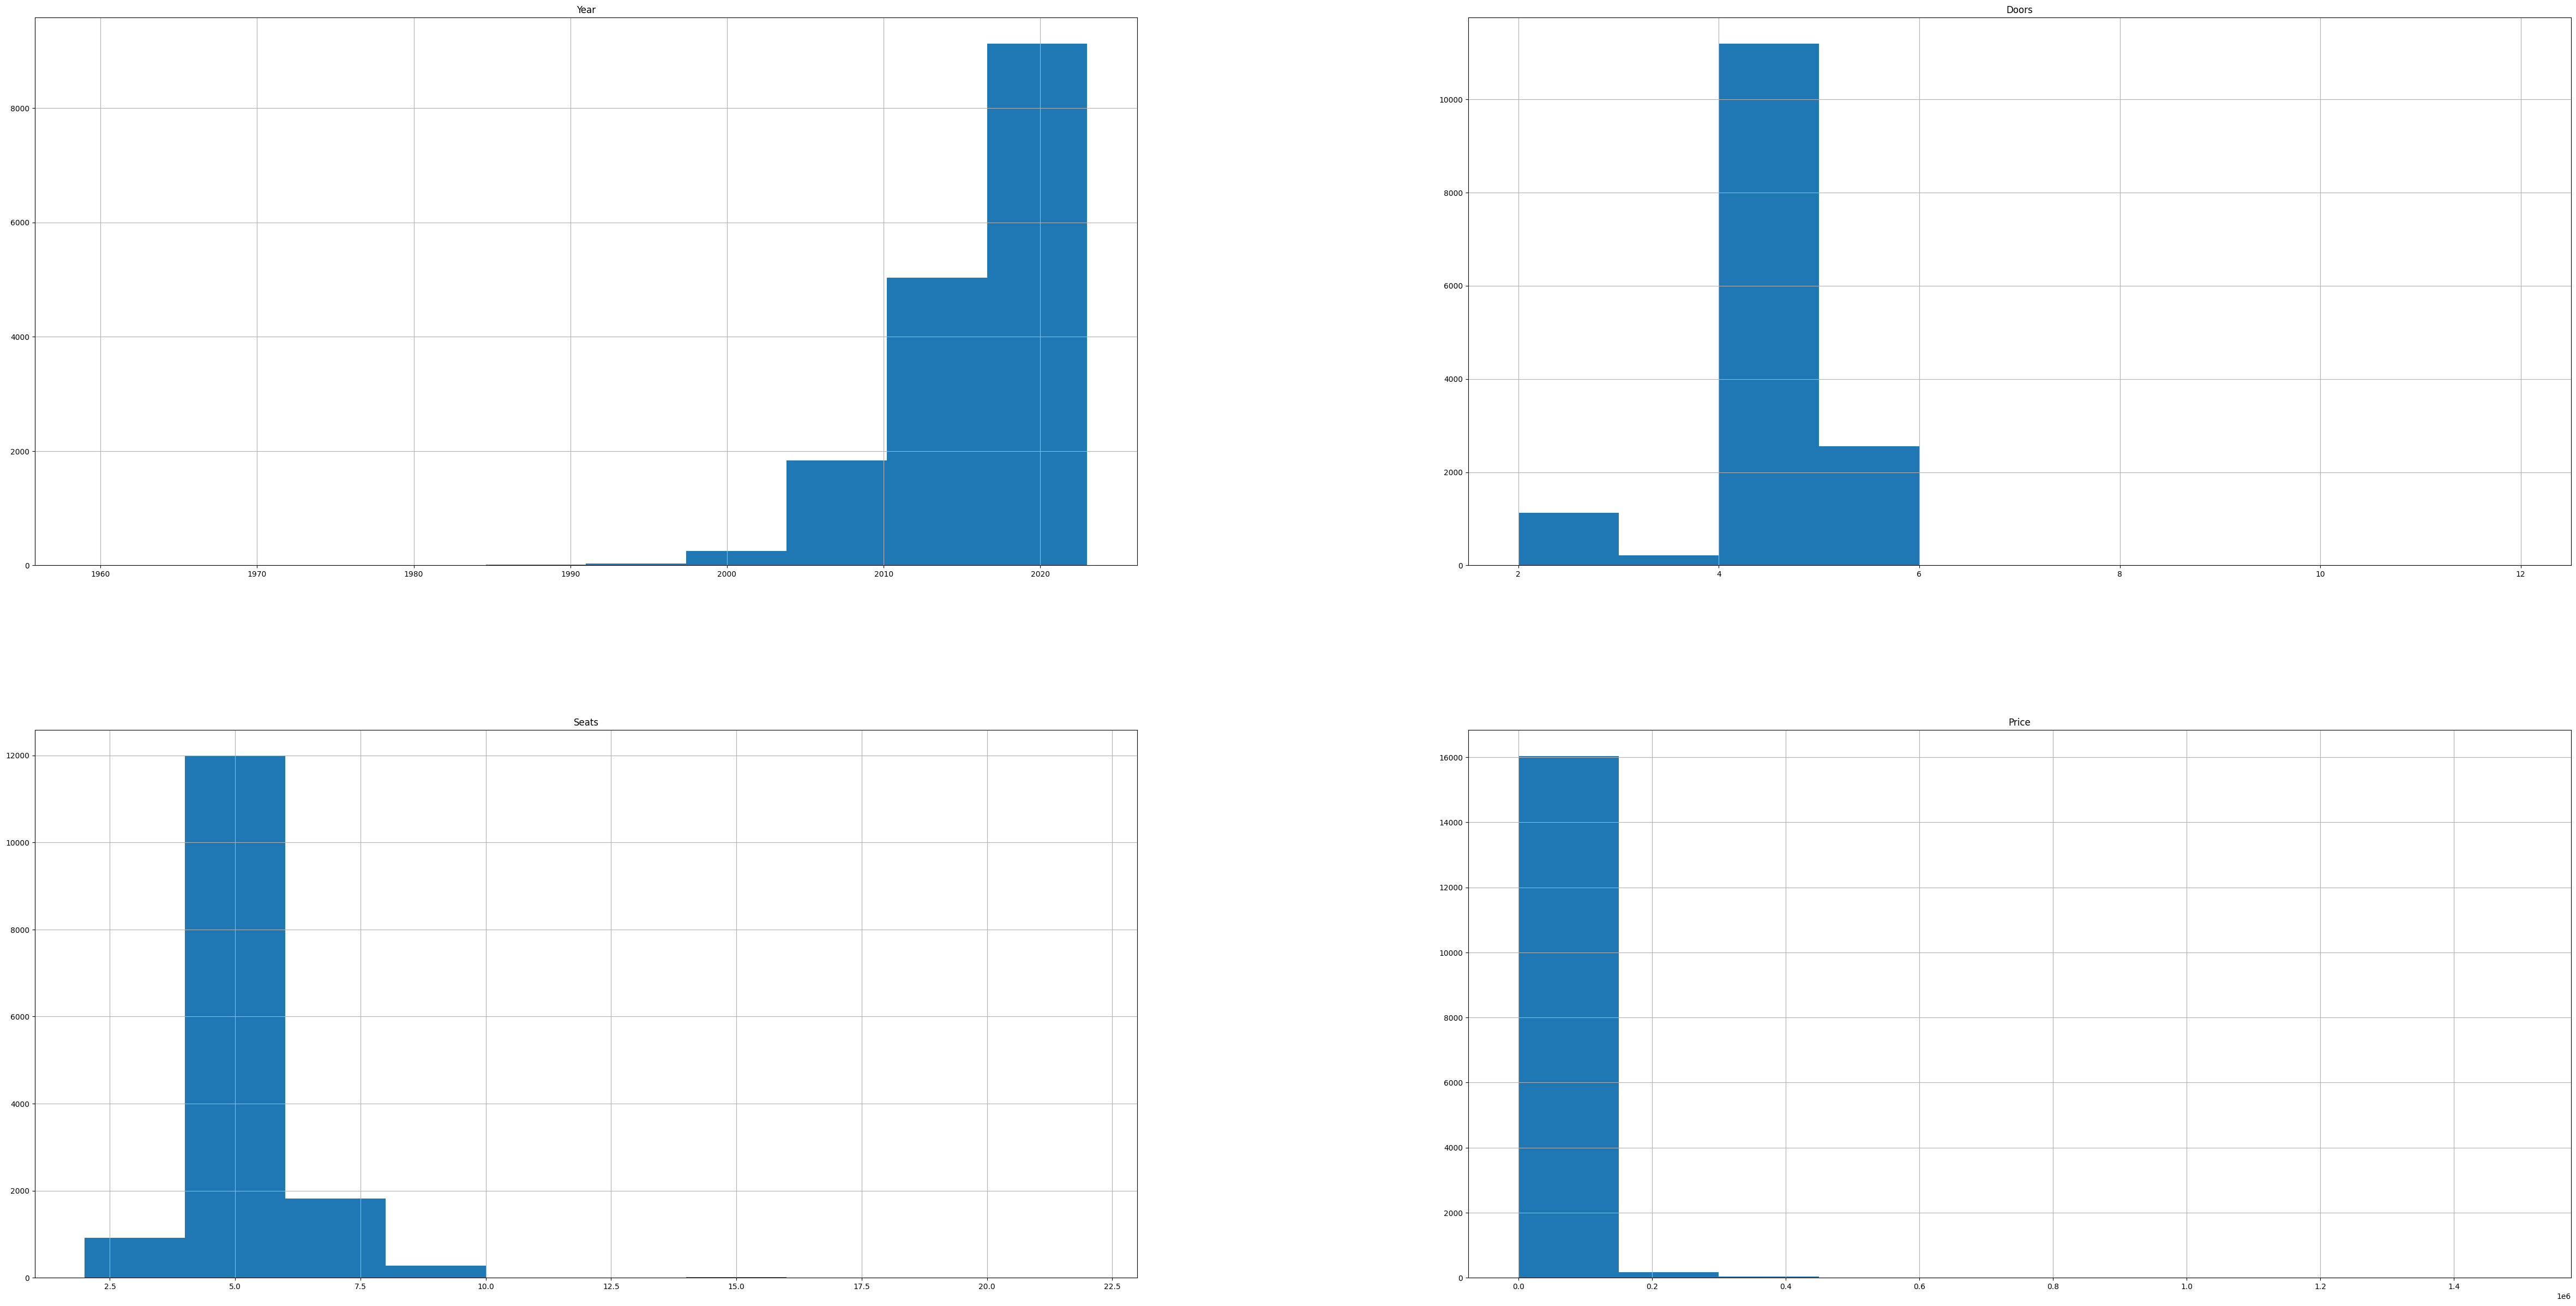

In [ ]:
# not distribution in 4 columns ==> use median.
df.hist(figsize = (60,30))
plt.show()

In [ ]:
ct = ColumnTransformer(
    [("median_imp", SimpleImputer(strategy = 'median'), ['Doors','Seats','Price'])])
df[['Doors','Seats','Price']] = ct.fit_transform(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16306 non-null  object 
 1   Year               16306 non-null  int64  
 2   Model              16306 non-null  object 
 3   Car/Suv            16306 non-null  object 
 4   Title              16306 non-null  object 
 5   UsedOrNew          16306 non-null  object 
 6   Transmission       16306 non-null  object 
 7   Engine             16306 non-null  object 
 8   DriveType          16306 non-null  object 
 9   FuelType           16306 non-null  object 
 10  FuelConsumption    16306 non-null  object 
 11  Kilometres         16306 non-null  object 
 12  ColourExtInt       16306 non-null  object 
 13  Location           16306 non-null  object 
 14  CylindersinEngine  16306 non-null  object 
 15  BodyType           16306 non-null  object 
 16  Doors              163

## clean seperate column

In [ ]:
# i investigate that we can clean Title column after Model word column
# Title columns
list_extra_word = []
list_title = df['Title'].tolist()
list_model = df['Model'].tolist()
for i in range(len(df)):
    list_extra_word.append(list_title[i].split(f'{list_model[i]} ')[-1:][0])
df['extra_word'] = list_extra_word

In [ ]:
# so we can delete title column and use only extra_word columns
df[['Year','Brand','Model','Title','extra_word']]

,Year,Brand,Model,Title,extra_word
0,2022,Ssangyong,Rexton,2022 Ssangyong Rexton Ultimate (awd),Ultimate (awd)
1,2022,MG,MG3,2022 MG MG3 Auto Excite (with Navigation),Auto Excite (with Navigation)
2,2022,BMW,430I,2022 BMW 430I M Sport,M Sport
3,2011,Mercedes-Benz,E500,2011 Mercedes-Benz E500 Elegance,Elegance
4,2022,Renault,Arkana,2022 Renault Arkana Intens,Intens
...,...,...,...,...,...
16301,2021,Nissan,Qashqai,2021 Nissan Qashqai TI,TI
16302,2014,Toyota,Alphard,2014 Toyota Alphard,2014 Toyota Alphard
16303,2022,Suzuki,Vitara,2022 Suzuki Vitara 1.6L,1.6L
16304,2016,Mercedes-Benz,GLC250,2016 Mercedes-Benz GLC250,2016 Mercedes-Benz GLC250


In [ ]:
del df['Title']

In [ ]:
# Engine,
df['Engine']

0        4 cyl, 2.2 L
1        4 cyl, 1.5 L
2          4 cyl, 2 L
3        8 cyl, 5.5 L
4        4 cyl, 1.3 L
             ...     
16301      4 cyl, 2 L
16302               -
16303    4 cyl, 1.6 L
16304      4 cyl, 2 L
16305      4 cyl, 2 L
Name: Engine, Length: 16306, dtype: object

In [ ]:
# engine column
list_engine_capacity = []
list_engine_power = []
list_engine_column = df['Engine'].tolist()
for i in range(len(list_engine_column)):
  if '-' == list_engine_column[i]:
    list_engine_capacity.append(np.nan)
    list_engine_power.append(np.nan)
  elif 'cyl' in list_engine_column[i] and 'L' in list_engine_column[i]:
    list_engine_capacity.append(int(list_engine_column[i].split(" cyl, ")[0]))
    list_engine_power.append(float(list_engine_column[i].split(" cyl, ")[1].split(" L")[0]))
  elif 'L' in list_engine_column[i]:
    list_engine_capacity.append(np.nan)
    list_engine_power.append(float(list_engine_column[i].split(' L')[0]))

  elif 'cyl' in list_engine_column[i]:
    list_engine_capacity.append(int(list_engine_column[i].split(' cyl')[0]))
    list_engine_power.append(np.nan)
df['engine_capacity'] = list_engine_capacity
df['engine_power'] = list_engine_power
del df['Engine']

In [ ]:
df['engine_capacity'].unique()
df['engine_power'].unique()

array([2.2, 1.5, 2. , 5.5, 1.3, nan, 1.6, 2.7, 3. , 1.4, 1. , 2.4, 2.5,
       1.2, 1.8, 4. , 3.5, 3.2, 6. , 2.3, 4.1, 3.6, 4.8, 3.8, 3.3, 4.2,
       2.8, 4.5, 6.6, 3.7, 2.1, 4.4, 5. , 1.9, 0. , 5.7, 0.9, 6.2, 4.7,
       1.7, 4.6, 6.4, 2.9, 5.4, 6.8, 5.6, 5.3, 4.9, 2.6, 7.3, 4.3, 3.1,
       6.3, 3.4, 3.9, 6.1, 6.5, 5.9, 0.7, 7.8, 5.1, 8.9, 9.8, 7.7, 6.7,
       5.2])

In [ ]:
# it can be seen that CylindersinEngine column always the same engine_capacity column and engine_power column. So, We can delete that.
df

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,extra_word,engine_capacity,engine_power
0,Ssangyong,2022,Rexton,SUV,DEMO,Automatic,AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4.0,7.0,51990.0,Ultimate (awd),4.0,2.2
1,MG,2022,MG3,Hatchback,USED,Automatic,Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5.0,5.0,19990.0,Auto Excite (with Navigation),4.0,1.5
2,BMW,2022,430I,Coupe,USED,Automatic,Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2.0,4.0,108988.0,M Sport,4.0,2.0
3,Mercedes-Benz,2011,E500,Coupe,USED,Automatic,Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2.0,4.0,32990.0,Elegance,8.0,5.5
4,Renault,2022,Arkana,SUV,USED,Automatic,Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4.0,5.0,34990.0,Intens,4.0,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16301,Nissan,2021,Qashqai,SUV,USED,Automatic,Front,Unleaded,6.9 L / 100 km,32977,White / -,"Rocklea, QLD",4 cyl,SUV,4.0,5.0,36770.0,TI,4.0,2.0
16302,Toyota,2014,Alphard,Commercial,USED,Automatic,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7.0,5.0,29500.0,2014 Toyota Alphard,NaN,NaN
16303,Suzuki,2022,Vitara,SUV,DEMO,Automatic,Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4.0,5.0,35280.0,1.6L,4.0,1.6
16304,Mercedes-Benz,2016,GLC250,SUV,USED,Automatic,AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4.0,5.0,41888.0,2016 Mercedes-Benz GLC250,4.0,2.0


In [ ]:
df[['CylindersinEngine','engine_capacity','engine_power']]

,CylindersinEngine,engine_capacity,engine_power
0,4 cyl,4.0,2.2
1,4 cyl,4.0,1.5
2,4 cyl,4.0,2.0
3,8 cyl,8.0,5.5
4,4 cyl,4.0,1.3
...,...,...,...
16301,4 cyl,4.0,2.0
16302,-,NaN,NaN
16303,4 cyl,4.0,1.6
16304,4 cyl,4.0,2.0


In [ ]:
del df['CylindersinEngine']

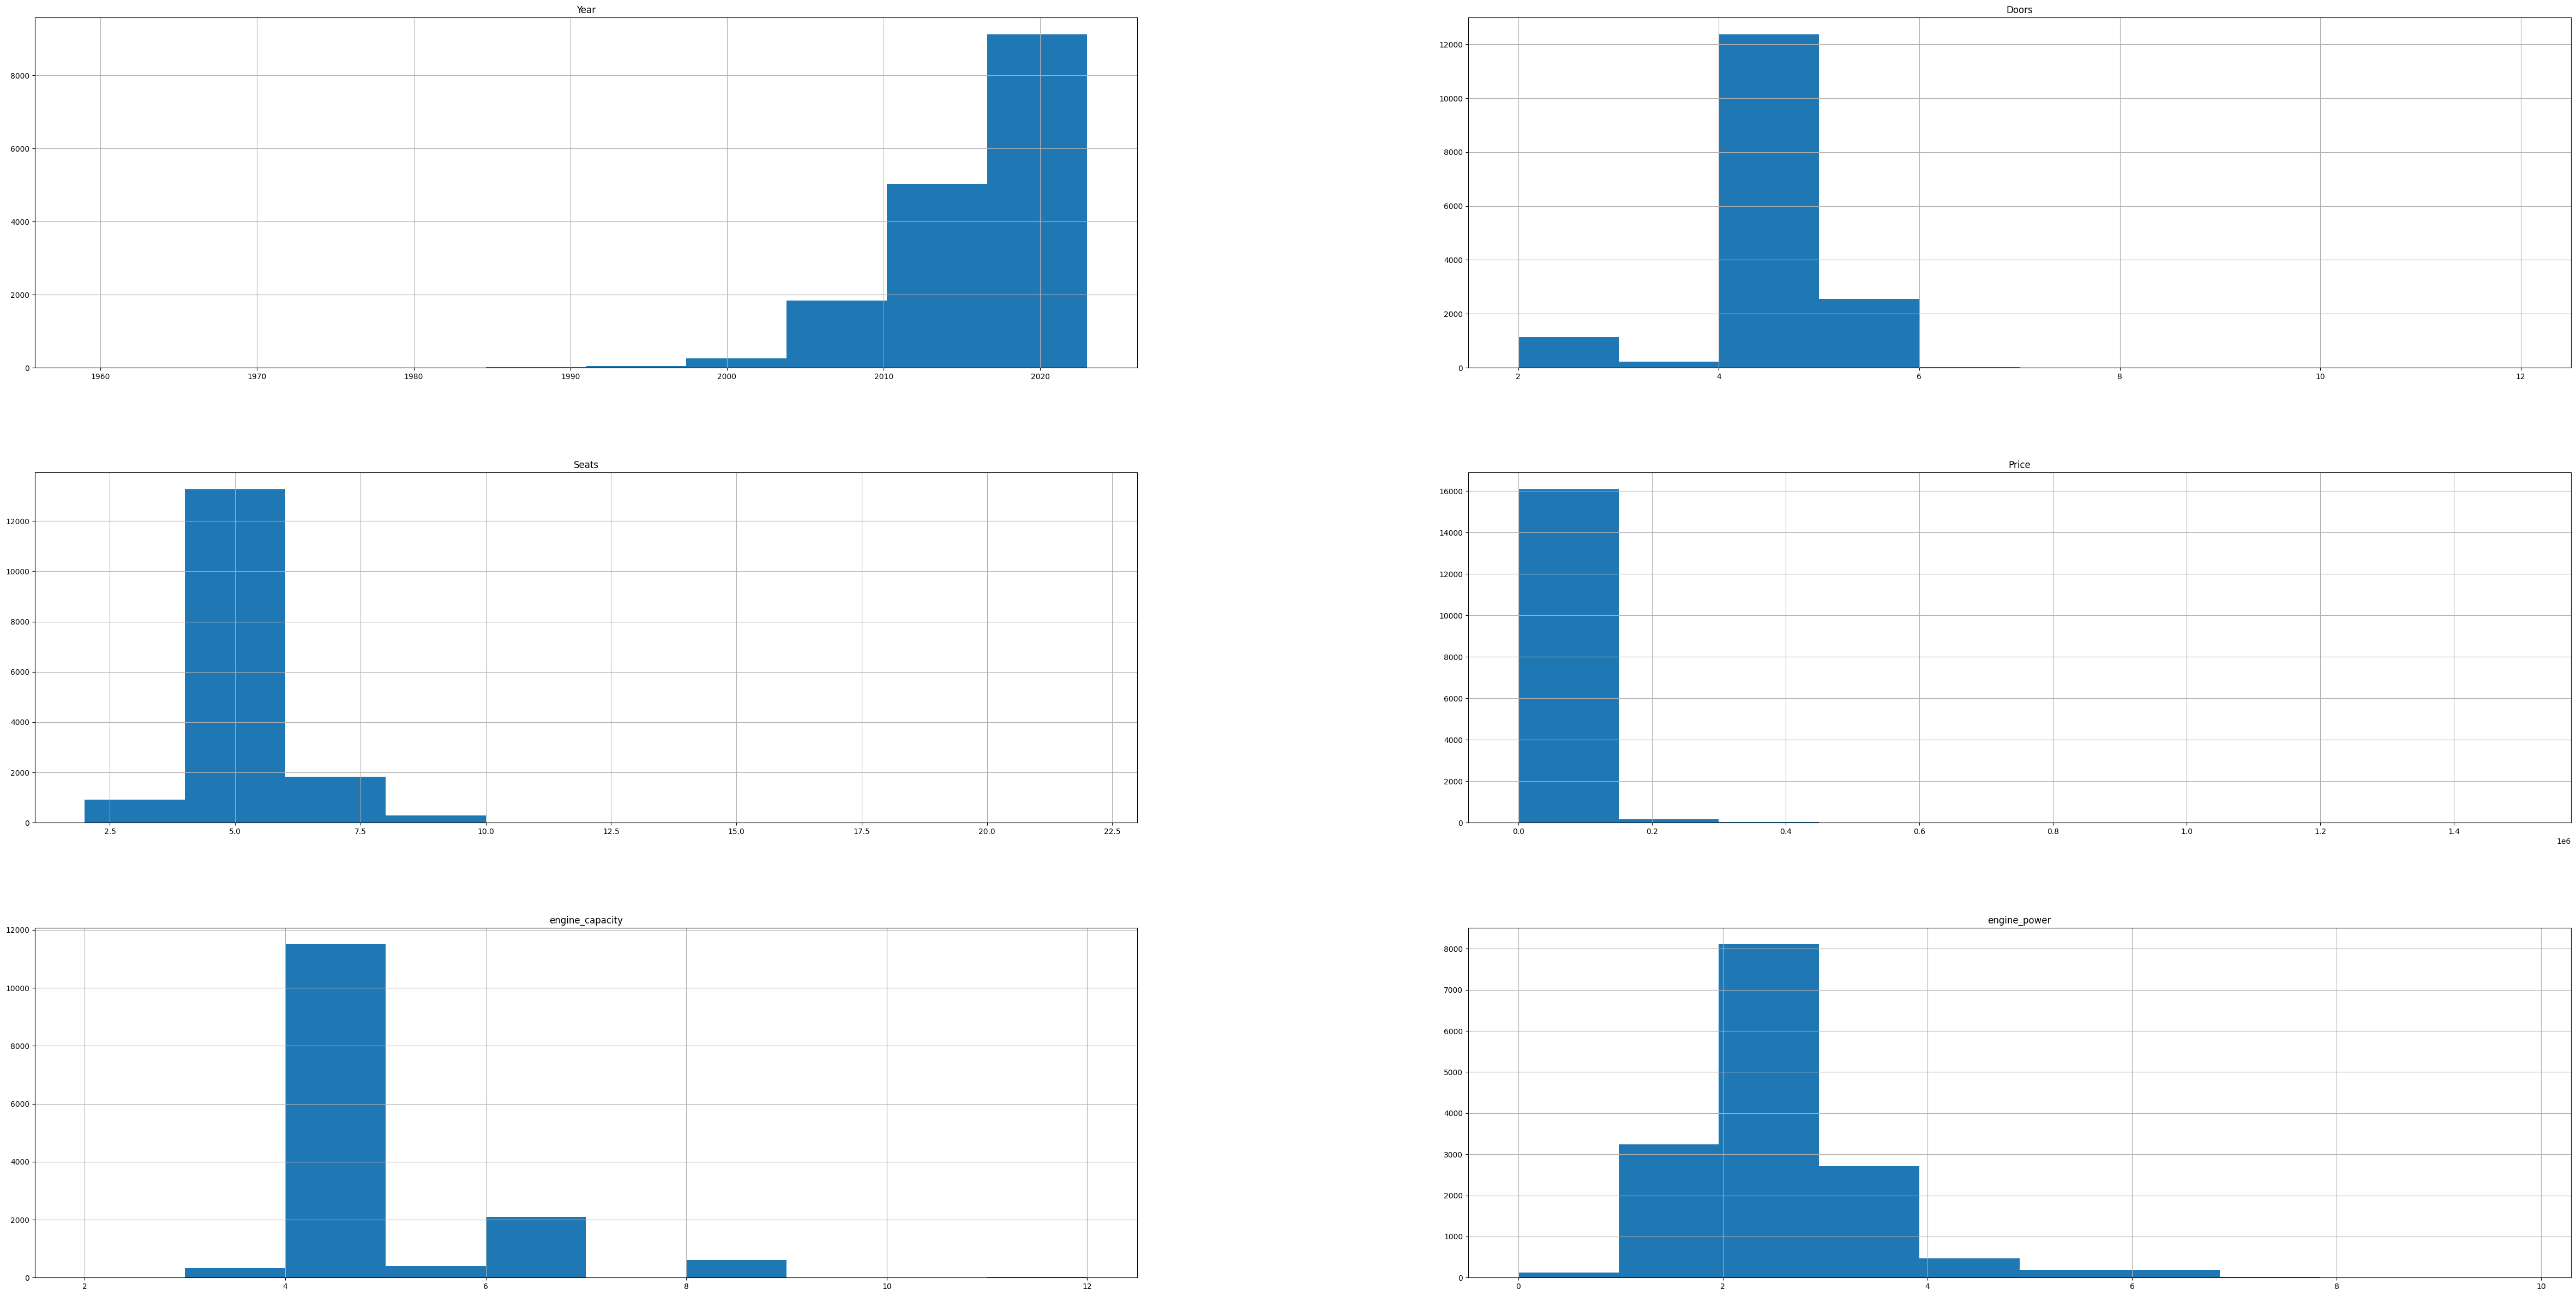

In [ ]:
# not distribution in 2 columns ==> use median.
df.hist(figsize = (60,30))
plt.show()

In [ ]:
ct = ColumnTransformer(
    [("median_imp", SimpleImputer(strategy = 'median'), ['engine_capacity','engine_power'])])
df[['engine_capacity','engine_power']] = ct.fit_transform(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            16306 non-null  object 
 1   Year             16306 non-null  int64  
 2   Model            16306 non-null  object 
 3   Car/Suv          16306 non-null  object 
 4   UsedOrNew        16306 non-null  object 
 5   Transmission     16306 non-null  object 
 6   DriveType        16306 non-null  object 
 7   FuelType         16306 non-null  object 
 8   FuelConsumption  16306 non-null  object 
 9   Kilometres       16306 non-null  object 
 10  ColourExtInt     16306 non-null  object 
 11  Location         16306 non-null  object 
 12  BodyType         16306 non-null  object 
 13  Doors            16306 non-null  float64
 14  Seats            16306 non-null  float64
 15  Price            16306 non-null  float64
 16  extra_word       16306 non-null  object 
 17  engine_capac

In [ ]:
# FuelConsumption, ColourExtInt, Location

In [ ]:
df['FuelConsumption']

0        8.7 L / 100 km
1        6.7 L / 100 km
2        6.6 L / 100 km
3         11 L / 100 km
4          6 L / 100 km
              ...      
16301    6.9 L / 100 km
16302                 -
16303    6.2 L / 100 km
16304    7.2 L / 100 km
16305      7 L / 100 km
Name: FuelConsumption, Length: 16306, dtype: object

In [ ]:
# FuelConsumption
df['fuel_consumption_rate'] = df['FuelConsumption'].map(lambda x : x.split(' L')[0]).map(lambda x : x if x == '-' else float(x))
df['fuel_consumption_kilometres'] = df['FuelConsumption'].map(lambda x : x[-6:-3] if (len(x)>=2) else x)
df['fuel_consumption_kilometres'].unique().tolist()
# del df['fuel_consumption_kilometres']
del df['FuelConsumption']

In [ ]:
df[['fuel_consumption_rate','fuel_consumption_kilometres']]

,fuel_consumption_rate,fuel_consumption_kilometres
0,8.7,100
1,6.7,100
2,6.6,100
3,11.0,100
4,6.0,100
...,...,...
16301,6.9,100
16302,-,-
16303,6.2,100
16304,7.2,100


In [ ]:
# we can delete fuel_consumption_kilometres because it has only 100 and - value
df['fuel_consumption_kilometres'].unique()

array(['100', '-'], dtype=object)

In [ ]:
del df['fuel_consumption_kilometres']

In [ ]:
df['fuel_consumption_rate'].unique()

array([8.7, 6.7, 6.6, 11.0, 6.0, '-', 5.1, 8.0, 7.1, 4.5, 9.8, 6.2, 5.6,
       5.4, 7.5, 6.1, 8.4, 5.8, 4.7, 7.9, 8.2, 6.9, 8.1, 4.2, 7.7, 9.1,
       0.0, 7.4, 7.6, 7.8, 9.9, 10.9, 9.6, 10.0, 8.8, 6.4, 8.9, 9.0, 6.3,
       10.4, 7.2, 5.5, 14.5, 5.9, 9.3, 11.5, 7.3, 9.2, 4.8, 10.1, 8.3,
       6.5, 8.6, 5.2, 4.9, 8.5, 10.5, 10.3, 12.2, 7.0, 9.5, 16.0, 9.4,
       6.8, 4.6, 11.6, 5.3, 9.7, 10.6, 11.8, 10.2, 3.3, 5.7, 10.8, 13.6,
       10.7, 11.3, 14.6, 13.0, 4.1, 3.6, 12.1, 17.2, 12.3, 12.8, 13.3,
       12.7, 13.2, 15.1, 3.9, 5.0, 14.8, 11.7, 16.4, 13.7, 12.6, 11.2,
       13.8, 4.4, 11.1, 12.4, 4.0, 12.0, 3.8, 1.9, 11.4, 13.5, 27.0, 11.9,
       14.4, 13.4, 14.9, 20.0, 15.4, 15.5, 1.7, 12.5, 17.0, 16.8, 12.9,
       13.9, 13.1, 15.0, 17.1, 4.3, 18.3, 14.0, 14.2, 15.2, 15.3, 14.3,
       15.7, 3.5, 2.6, 19.8, 18.6, 16.2, 18.1, 2.4, 19.1, 17.4, 16.9,
       20.7, 19.0, 14.1, 3.7, 16.5, 2.5, 3.4, 14.7, 17.8, 1.6, 2.2, 3.2,
       2.3, 16.6, 15.8], dtype=object)

In [ ]:
# not distribution in 2 columns ==> use median.
# df[df['fuel_consumption_rate'] == "-"] = np.nan


df.loc[df['fuel_consumption_rate'] == "-", ['fuel_consumption_rate']] = np.nan

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  16306 non-null  object 
 1   Year                   16306 non-null  int64  
 2   Model                  16306 non-null  object 
 3   Car/Suv                16306 non-null  object 
 4   UsedOrNew              16306 non-null  object 
 5   Transmission           16306 non-null  object 
 6   DriveType              16306 non-null  object 
 7   FuelType               16306 non-null  object 
 8   Kilometres             16306 non-null  object 
 9   ColourExtInt           16306 non-null  object 
 10  Location               16306 non-null  object 
 11  BodyType               16306 non-null  object 
 12  Doors                  16306 non-null  float64
 13  Seats                  16306 non-null  float64
 14  Price                  16306 non-null  float64
 15  ex

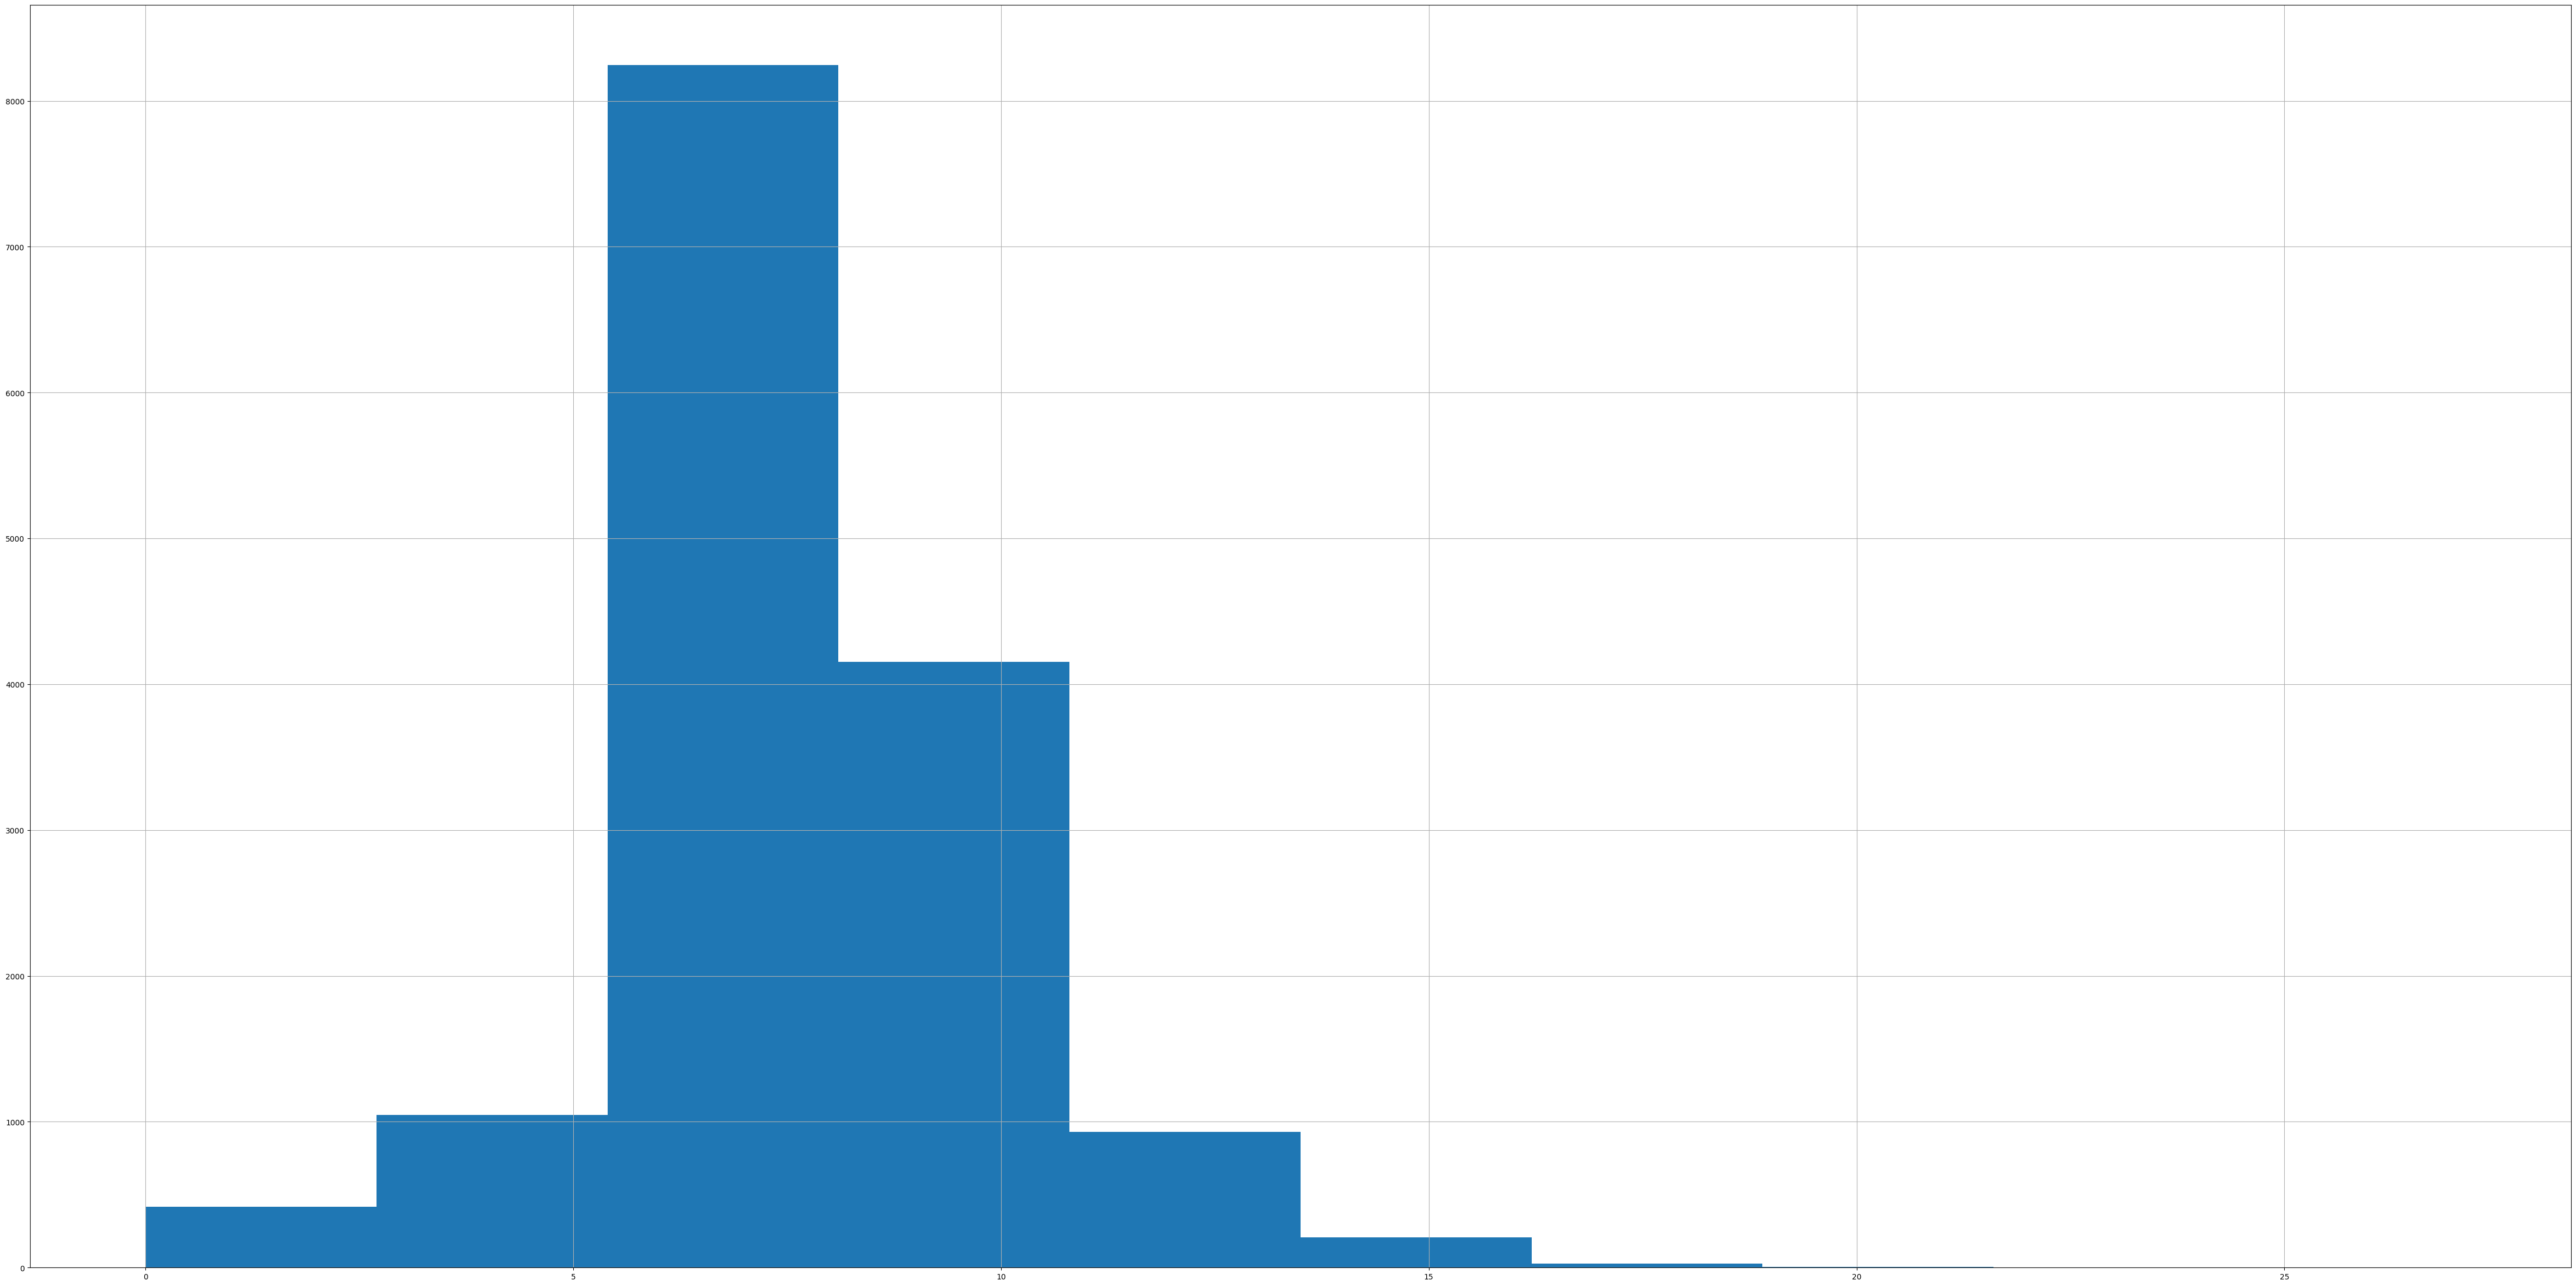

In [ ]:
# not distribution in 1 columns ==> use median.
df['fuel_consumption_rate'].hist(figsize = (60,30))
plt.show()

In [ ]:
ct = ColumnTransformer(
    [("median_imp", SimpleImputer(strategy = 'median'), ['fuel_consumption_rate'])])
df[['fuel_consumption_rate']] = ct.fit_transform(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  16306 non-null  object 
 1   Year                   16306 non-null  int64  
 2   Model                  16306 non-null  object 
 3   Car/Suv                16306 non-null  object 
 4   UsedOrNew              16306 non-null  object 
 5   Transmission           16306 non-null  object 
 6   DriveType              16306 non-null  object 
 7   FuelType               16306 non-null  object 
 8   Kilometres             16306 non-null  object 
 9   ColourExtInt           16306 non-null  object 
 10  Location               16306 non-null  object 
 11  BodyType               16306 non-null  object 
 12  Doors                  16306 non-null  float64
 13  Seats                  16306 non-null  float64
 14  Price                  16306 non-null  float64
 15  ex

In [ ]:
# ColourExtInt
df['ColourExtInt']

0        White / Black
1        Black / Black
2         Grey / White
3        White / Brown
4         Grey / Black
             ...      
16301        White / -
16302         Grey / -
16303       Yellow / -
16304     Grey / Black
16305         Gold / -
Name: ColourExtInt, Length: 16306, dtype: object

In [ ]:
# ColourExtInt
df['colour_exterior'] = df['ColourExtInt'].map(lambda x : x.split(' / ')[0])
df['colour_interior'] = df['ColourExtInt'].map(lambda x : x.split(' / ')[1])
del df['ColourExtInt']

In [ ]:
df.info()
df[['colour_exterior','colour_interior']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  16306 non-null  object 
 1   Year                   16306 non-null  int64  
 2   Model                  16306 non-null  object 
 3   Car/Suv                16306 non-null  object 
 4   UsedOrNew              16306 non-null  object 
 5   Transmission           16306 non-null  object 
 6   DriveType              16306 non-null  object 
 7   FuelType               16306 non-null  object 
 8   Kilometres             16306 non-null  object 
 9   Location               16306 non-null  object 
 10  BodyType               16306 non-null  object 
 11  Doors                  16306 non-null  float64
 12  Seats                  16306 non-null  float64
 13  Price                  16306 non-null  float64
 14  extra_word             16306 non-null  object 
 15  en

,colour_exterior,colour_interior
0,White,Black
1,Black,Black
2,Grey,White
3,White,Brown
4,Grey,Black
...,...,...
16301,White,-
16302,Grey,-
16303,Yellow,-
16304,Grey,Black


In [ ]:
df['location_province'] = df['Location'].map(lambda x : x.split(', ')[0])
df['location_state'] = df['Location'].map(lambda x : x.split(', ')[1])

del df['Location']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  16306 non-null  object 
 1   Year                   16306 non-null  int64  
 2   Model                  16306 non-null  object 
 3   Car/Suv                16306 non-null  object 
 4   UsedOrNew              16306 non-null  object 
 5   Transmission           16306 non-null  object 
 6   DriveType              16306 non-null  object 
 7   FuelType               16306 non-null  object 
 8   Kilometres             16306 non-null  object 
 9   BodyType               16306 non-null  object 
 10  Doors                  16306 non-null  float64
 11  Seats                  16306 non-null  float64
 12  Price                  16306 non-null  float64
 13  extra_word             16306 non-null  object 
 14  engine_capacity        16306 non-null  float64
 15  en

## clean object to integer

In [ ]:
df.loc[(df['Kilometres'] == "-") | (df['Kilometres'] == "- / -"), ['Kilometres']] = np.nan
ct = ColumnTransformer(
    [("median_imp", SimpleImputer(strategy = 'median'), ['Kilometres'])])
df[['Kilometres']] = ct.fit_transform(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  16306 non-null  object 
 1   Year                   16306 non-null  int64  
 2   Model                  16306 non-null  object 
 3   Car/Suv                16306 non-null  object 
 4   UsedOrNew              16306 non-null  object 
 5   Transmission           16306 non-null  object 
 6   DriveType              16306 non-null  object 
 7   FuelType               16306 non-null  object 
 8   Kilometres             16306 non-null  float64
 9   BodyType               16306 non-null  object 
 10  Doors                  16306 non-null  float64
 11  Seats                  16306 non-null  float64
 12  Price                  16306 non-null  float64
 13  extra_word             16306 non-null  object 
 14  engine_capacity        16306 non-null  float64
 15  en

In [ ]:
df[['Brand','Model','Car/Suv','UsedOrNew','Transmission','DriveType','FuelType','BodyType','extra_word','colour_exterior','colour_interior','location_province','location_state']]
# Kilometres
# Brand, Model, Car/Suv, UsedOrNew, Transmission, DriveType, FuelType, Kilometres, BodyType, extra_word, colour_exterior, colour_interior, location_province, location_state

,Brand,Model,Car/Suv,UsedOrNew,Transmission,DriveType,FuelType,BodyType,extra_word,colour_exterior,colour_interior,location_province,location_state
0,Ssangyong,Rexton,SUV,DEMO,Automatic,AWD,Diesel,SUV,Ultimate (awd),White,Black,Caringbah,NSW
1,MG,MG3,Hatchback,USED,Automatic,Front,Premium,Hatchback,Auto Excite (with Navigation),Black,Black,Brookvale,NSW
2,BMW,430I,Coupe,USED,Automatic,Rear,Premium,Coupe,M Sport,Grey,White,Sylvania,NSW
3,Mercedes-Benz,E500,Coupe,USED,Automatic,Rear,Premium,Coupe,Elegance,White,Brown,Mount Druitt,NSW
4,Renault,Arkana,SUV,USED,Automatic,Front,Unleaded,SUV,Intens,Grey,Black,Castle Hill,NSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16301,Nissan,Qashqai,SUV,USED,Automatic,Front,Unleaded,SUV,TI,White,-,Rocklea,QLD
16302,Toyota,Alphard,Commercial,USED,Automatic,Front,Unleaded,Commercial,2014 Toyota Alphard,Grey,-,Rocklea,QLD
16303,Suzuki,Vitara,SUV,DEMO,Automatic,Front,Unleaded,SUV,1.6L,Yellow,-,Dinmore,QLD
16304,Mercedes-Benz,GLC250,SUV,USED,Automatic,AWD,Premium,SUV,2016 Mercedes-Benz GLC250,Grey,Black,Albion,QLD


In [ ]:
print("Brand",len(df['Brand'].unique()))
print("Model",len(df['Model'].unique()))
print("Car/Suv",len(df['Car/Suv'].unique()))
print("UsedOrNew",len(df['UsedOrNew'].unique()))
print("Transmission",len(df['Transmission'].unique()))
print("DriveType",len(df['DriveType'].unique()))
print("FuelType",len(df['FuelType'].unique()))
print("BodyType",len(df['BodyType'].unique()))
print("extra_word",len(df['extra_word'].unique()))
print("colour_exterior",len(df['colour_exterior'].unique()))
print("colour_interior",len(df['colour_interior'].unique()))
print("location_province",len(df['location_province'].unique()))
print("location_state",len(df['location_state'].unique()))

Brand 72
Model 758
Car/Suv 10
UsedOrNew 3
Transmission 3
DriveType 5
FuelType 9
BodyType 10
extra_word 3725
colour_exterior 27
colour_interior 424
location_province 606
location_state 10


In [ ]:
list_replace_column = ["Brand","Model","Car/Suv","UsedOrNew","Transmission","DriveType","FuelType","BodyType","extra_word","colour_exterior","colour_interior","location_province","location_state"]
for i in range(len(list_replace_column)):
  unique_column_dict = {}
  list_unique_brand = df[f'{list_replace_column[i]}'].unique()
  for j in range(len(list_unique_brand)):
    unique_column_dict[list_unique_brand[j]] = j
  # print(unique_column_dict)
  df = df.replace({f'{list_replace_column[i]}': unique_column_dict})






In [ ]:
# {'deck': {'A': 0, 'B': 1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7},
#     'side':{'P': 0, 'S': 1}
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  16306 non-null  int64  
 1   Year                   16306 non-null  int64  
 2   Model                  16306 non-null  int64  
 3   Car/Suv                16306 non-null  int64  
 4   UsedOrNew              16306 non-null  int64  
 5   Transmission           16306 non-null  int64  
 6   DriveType              16306 non-null  int64  
 7   FuelType               16306 non-null  int64  
 8   Kilometres             16306 non-null  float64
 9   BodyType               16306 non-null  int64  
 10  Doors                  16306 non-null  float64
 11  Seats                  16306 non-null  float64
 12  Price                  16306 non-null  float64
 13  extra_word             16306 non-null  int64  
 14  engine_capacity        16306 non-null  float64
 15  en

# Exploratory Data Analysis

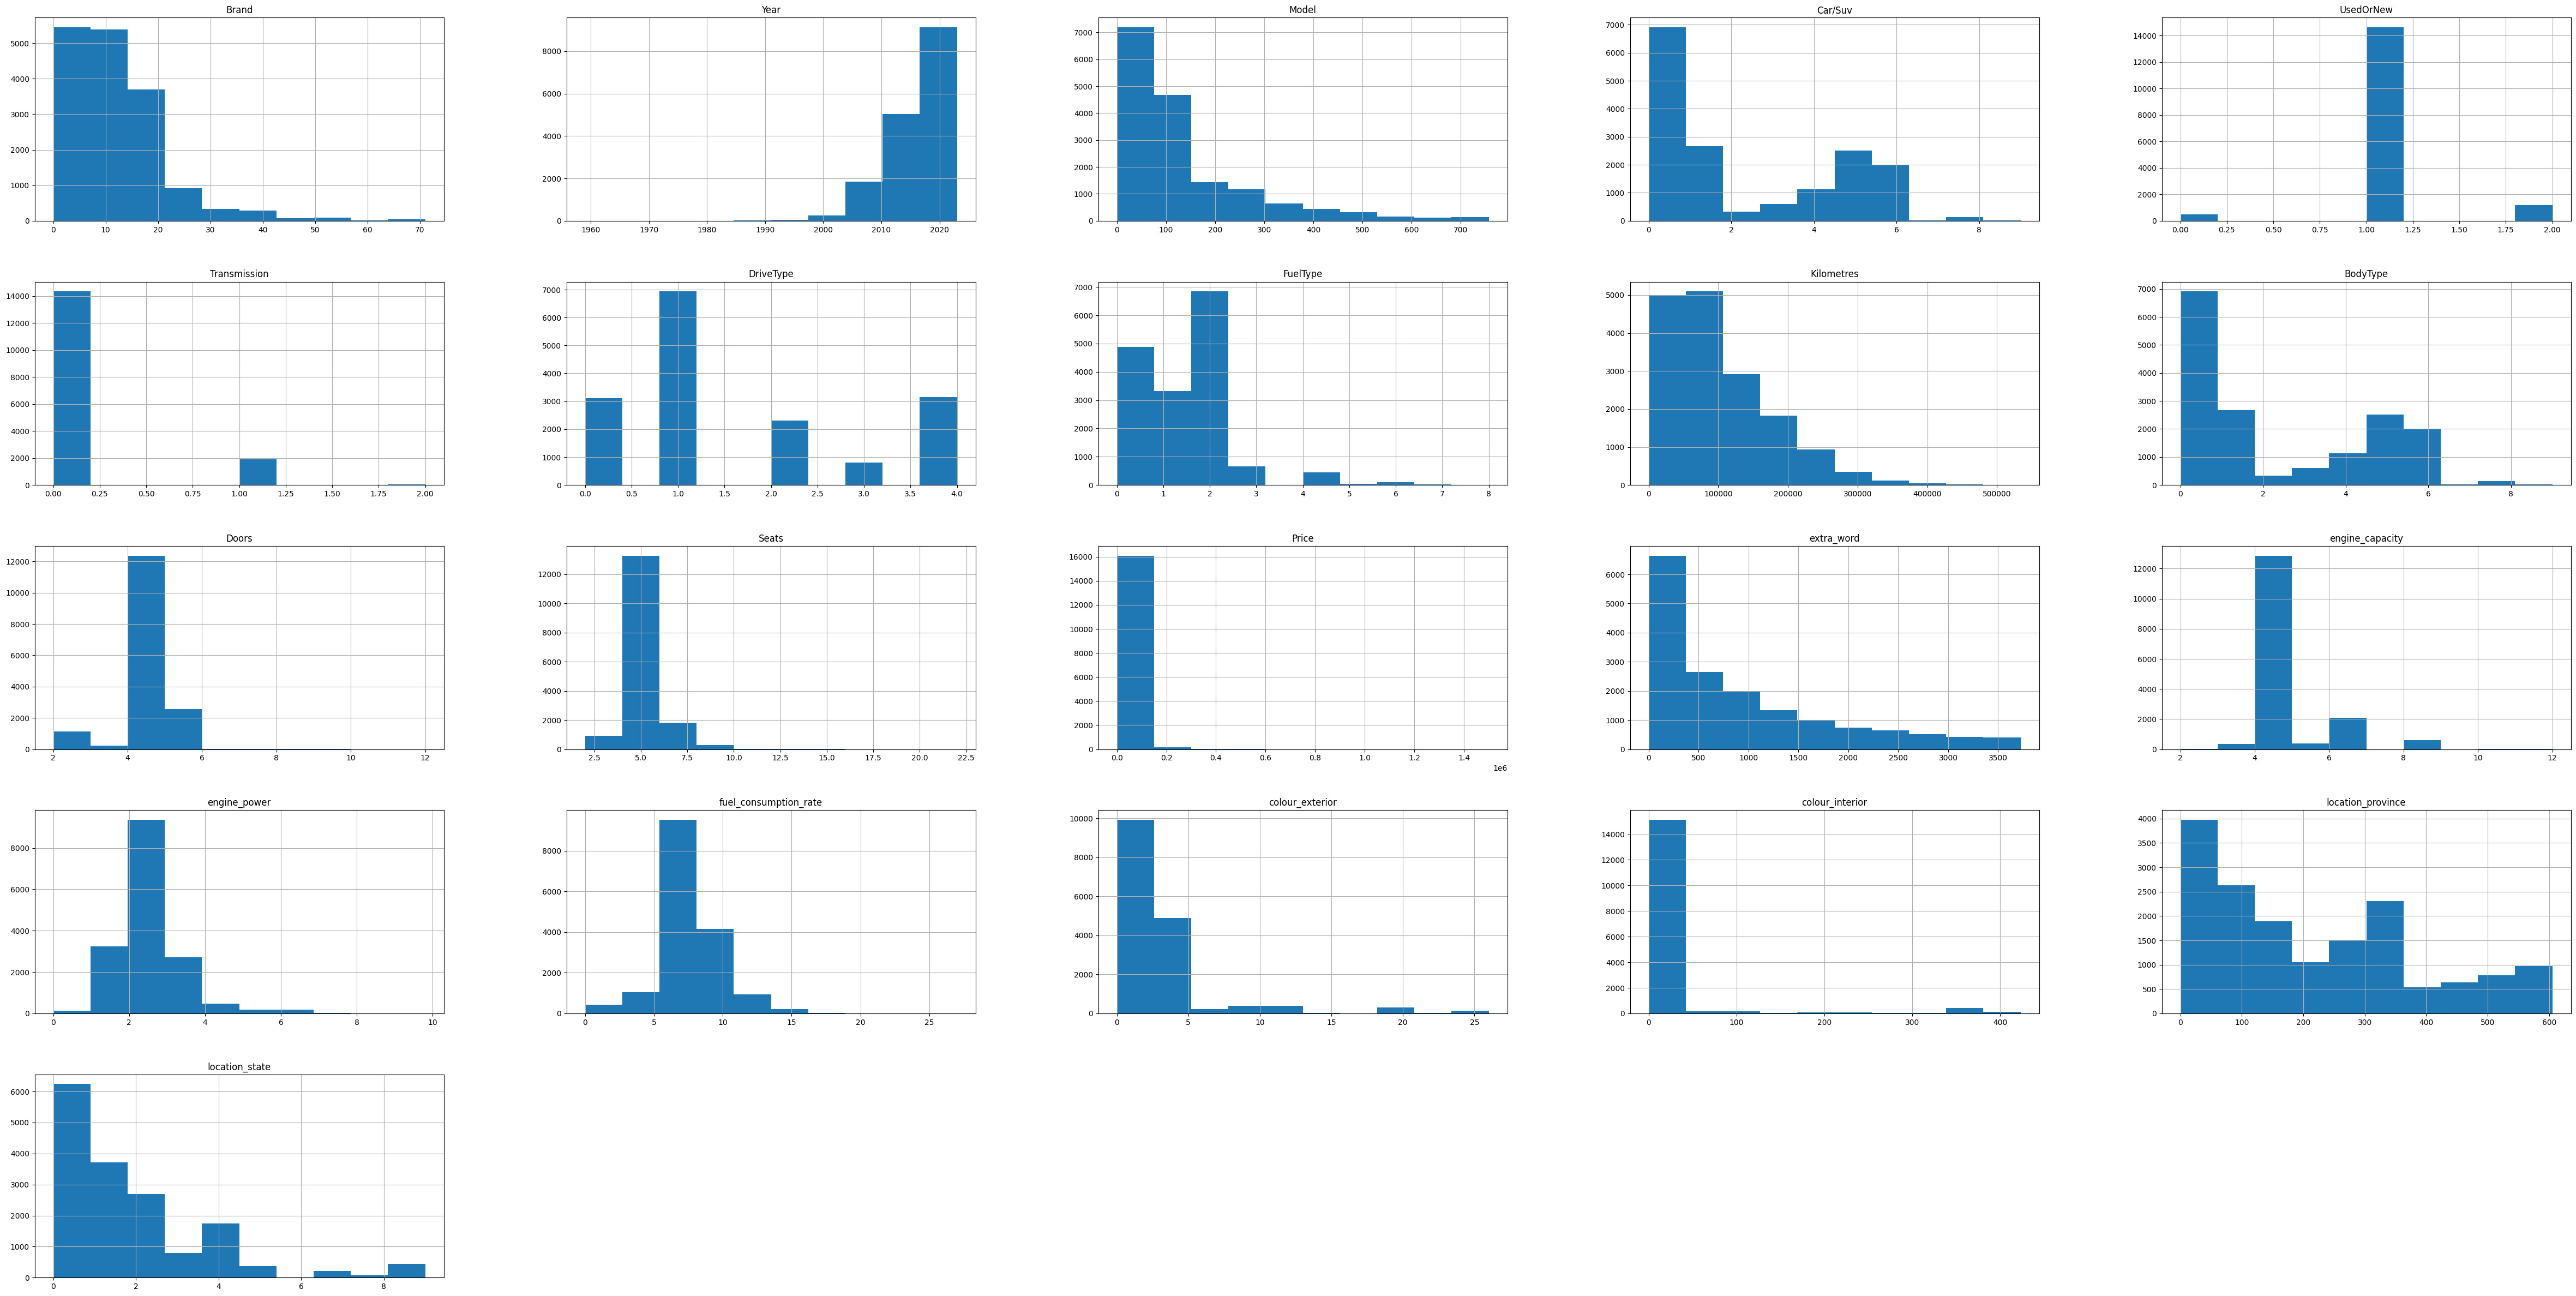

In [ ]:
df.hist(figsize = (60,30))
plt.show()

<Axes: >

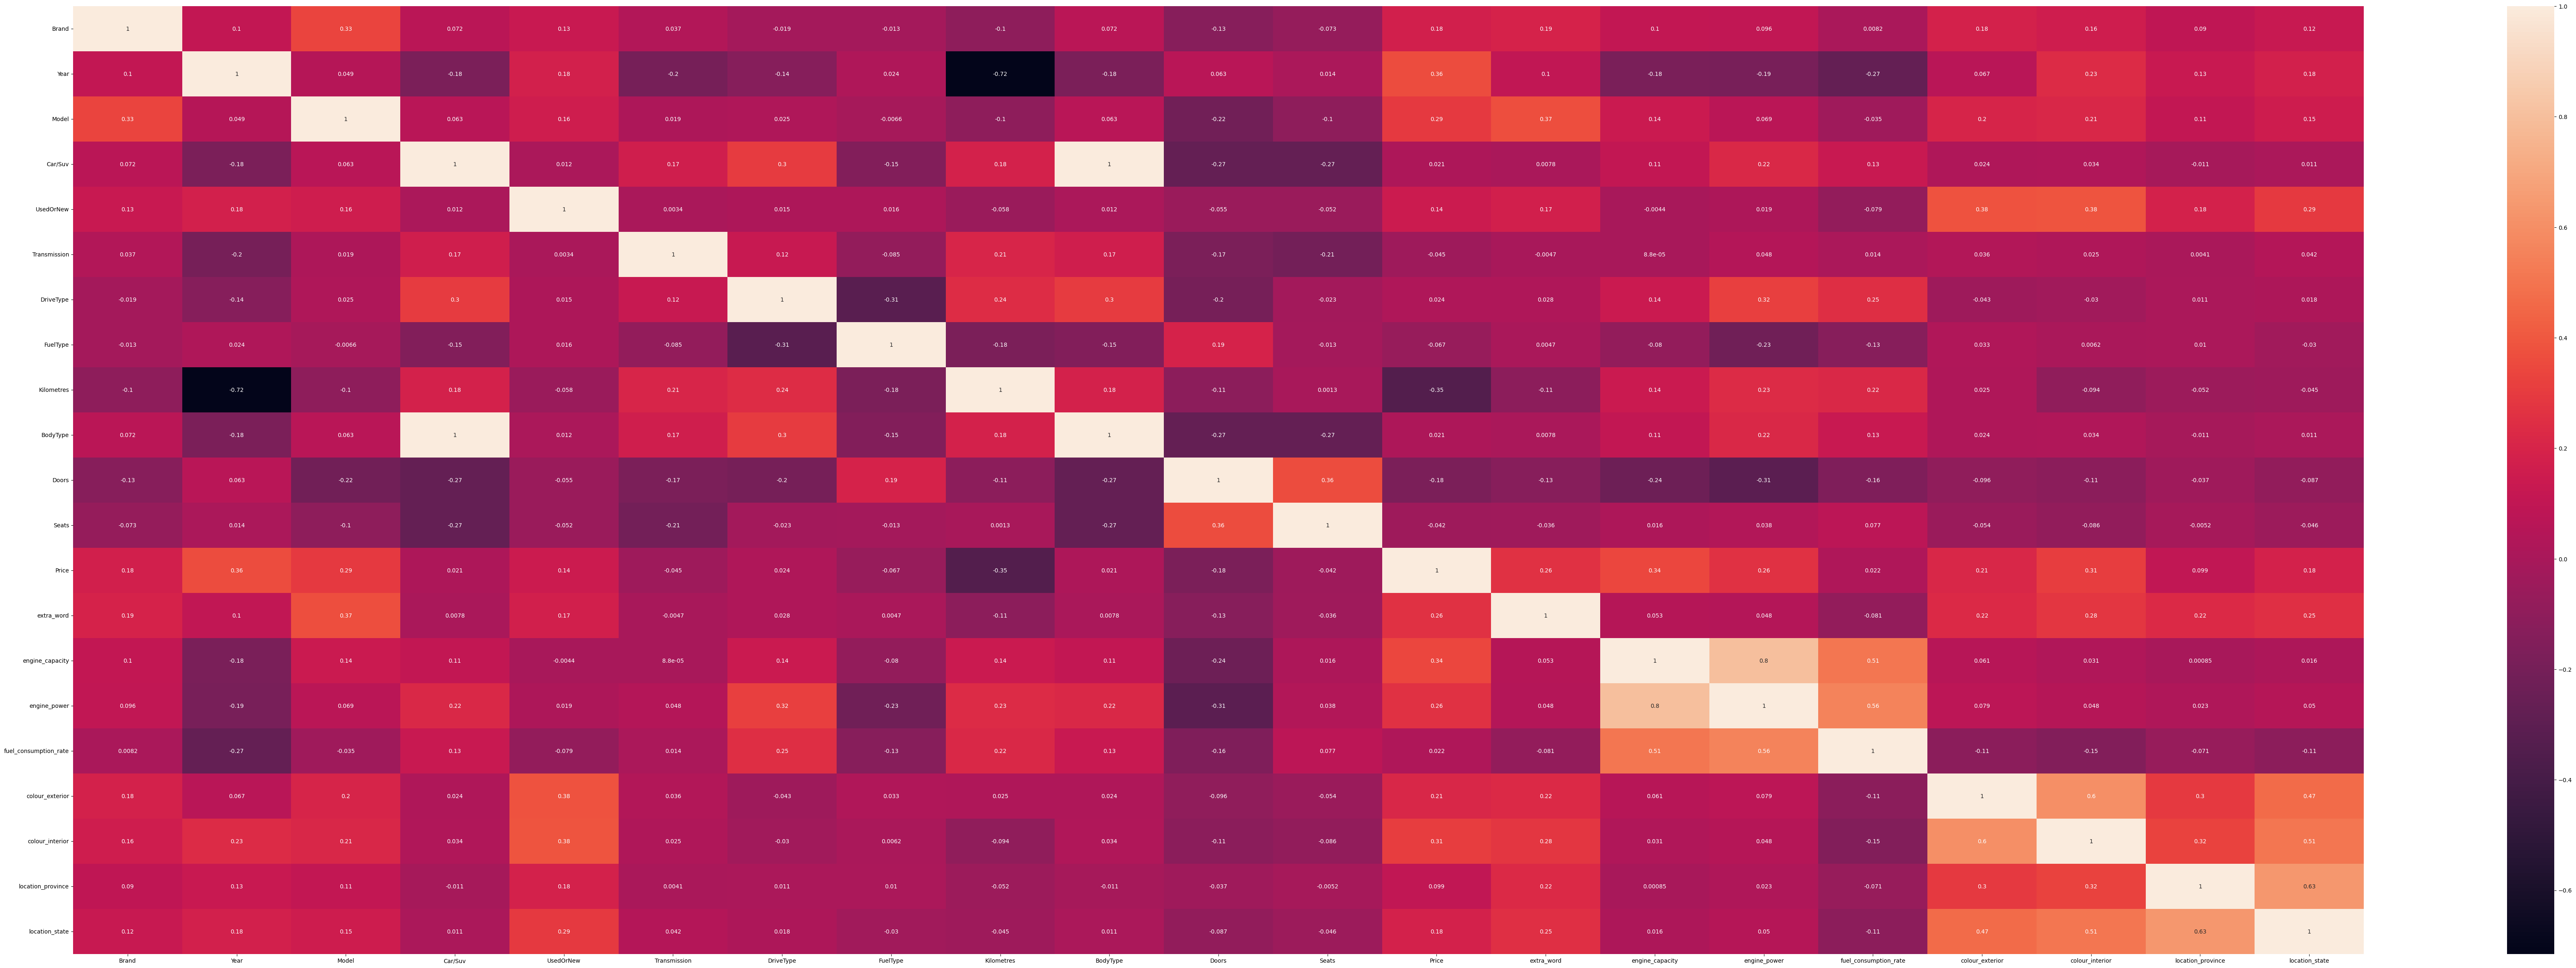

In [ ]:
plt.figure(figsize = (90,30))
df_corr = df.corr()
sns.heatmap(df_corr,xticklabels=df_corr.columns,yticklabels=df_corr.columns,annot=True)


In [ ]:
df_columns = df_corr.columns.tolist()
for i in range(len(df_columns)):
  correlation_columns = df_corr[f'{df_corr.columns[i]}']

  for j in range(len(df_columns)):
    correleation_row = correlation_columns[j]
    # if df_columns[i] == 'Spending_Score' or df_columns[j] == 'Spending_Score':
    if (correleation_row < 1 and correleation_row > 0.8) or (correleation_row > -1 and correleation_row < -0.5):
    # if (correleation_row < 0.1 and correleation_row > -0.1):
      print(df_columns[i],df_columns[j],correleation_row)

# 1,1
# -1,1
# 1,-1
# -1,-1
# - ความแตกต่าง
# + ความเหมือน

Year Kilometres -0.715521330407311
Kilometres Year -0.715521330407311
engine_capacity engine_power 0.8041676773837679
engine_power engine_capacity 0.8041676773837679


In [ ]:
df.describe()

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,BodyType,...,Seats,Price,extra_word,engine_capacity,engine_power,fuel_consumption_rate,colour_exterior,colour_interior,location_province,location_state
count,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,...,16306.000000,1.630600e+04,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000
mean,12.777321,2016.293389,133.121857,2.177542,1.043236,0.123513,1.628726,1.329756,99846.539740,2.177542,...,5.093463,3.725302e+04,908.839875,4.417331,2.387747,7.658702,2.823194,21.729609,212.358764,1.623881
std,9.280575,5.138167,138.635073,2.421095,0.318548,0.337319,1.368061,1.121448,77085.826991,2.421095,...,1.074803,3.713262e+04,936.137388,1.023282,0.888707,2.232307,4.009046,75.033952,172.154553,2.036048
min,0.000000,1959.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,8.800000e+01,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,2013.000000,39.000000,0.000000,1.000000,0.000000,1.000000,0.000000,43021.250000,0.000000,...,5.000000,1.899900e+04,171.000000,4.000000,2.000000,6.600000,0.000000,0.000000,65.000000,0.000000
50%,11.000000,2017.000000,87.000000,1.000000,1.000000,0.000000,1.000000,1.000000,86009.000000,1.000000,...,5.000000,2.949000e+04,574.000000,4.000000,2.200000,7.600000,2.000000,3.000000,166.000000,1.000000
75%,18.000000,2020.000000,167.000000,5.000000,1.000000,0.000000,2.000000,2.000000,144183.500000,5.000000,...,5.000000,4.399000e+04,1357.750000,4.000000,2.800000,8.600000,4.000000,3.000000,325.000000,2.000000
max,71.000000,2023.000000,757.000000,9.000000,2.000000,2.000000,4.000000,8.000000,533849.000000,9.000000,...,22.000000,1.500000e+06,3724.000000,12.000000,9.800000,27.000000,26.000000,423.000000,605.000000,9.000000


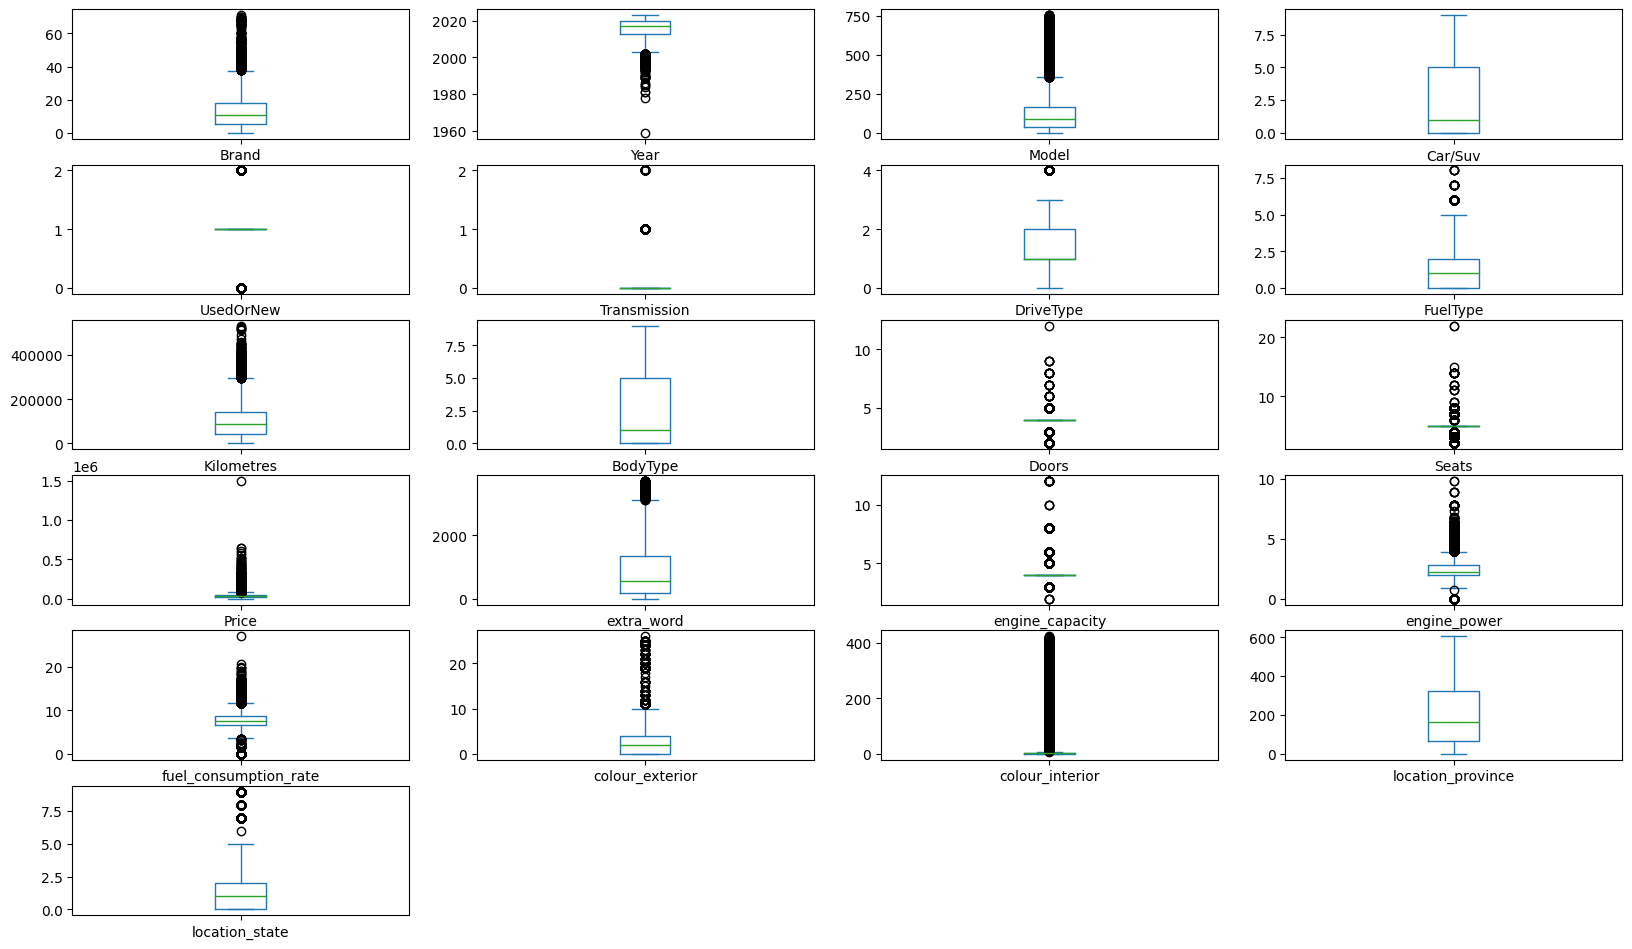

In [ ]:
df.plot(kind='box', subplots=True, figsize=(20, 40),layout=(20,4))
plt.show()

# Feature Engineering

In [ ]:
OutlierFactor = LocalOutlierFactor()
predict_outlier = OutlierFactor.fit_predict(df)
print(predict_outlier)
df['check_outlier'] = predict_outlier.tolist()
df = df[df['check_outlier'] == 1].reset_index(drop=True).drop(['check_outlier'], axis=1)
df


[1 1 1 ... 1 1 1]


,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,BodyType,...,Seats,Price,extra_word,engine_capacity,engine_power,fuel_consumption_rate,colour_exterior,colour_interior,location_province,location_state
0,0,2022,0,0,0,0,0,0,5595.0,0,...,7.0,51990.0,0,4.0,2.2,8.7,0,0,0,0
1,1,2022,1,1,1,0,1,1,16.0,1,...,5.0,19990.0,1,4.0,1.5,6.7,1,0,1,0
2,2,2022,2,2,1,0,2,1,8472.0,2,...,4.0,108988.0,2,4.0,2.0,6.6,2,1,2,0
3,3,2011,3,2,1,0,2,1,136517.0,2,...,4.0,32990.0,3,8.0,5.5,11.0,0,2,3,0
4,4,2022,4,0,1,0,1,2,1035.0,0,...,5.0,34990.0,4,4.0,1.3,6.0,2,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16159,7,2021,22,0,1,0,1,2,32977.0,0,...,5.0,36770.0,368,4.0,2.0,6.9,0,3,309,2
16160,5,2014,163,3,1,0,1,2,66000.0,3,...,5.0,29500.0,3723,4.0,2.2,7.6,2,3,309,2
16161,23,2022,155,0,0,0,1,2,5165.0,0,...,5.0,35280.0,855,4.0,1.6,6.2,7,3,404,2
16162,3,2016,340,0,1,0,0,1,85525.0,0,...,5.0,41888.0,2350,4.0,2.0,7.2,2,0,312,2


# train test split

In [ ]:
df.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'UsedOrNew', 'Transmission',
       'DriveType', 'FuelType', 'Kilometres', 'BodyType', 'Doors', 'Seats',
       'Price', 'extra_word', 'engine_capacity', 'engine_power',
       'fuel_consumption_rate', 'colour_exterior', 'colour_interior',
       'location_province', 'location_state'],
      dtype='object')

In [ ]:
# train test split to protect data overfitting
features = ['Brand', 'Year', 'Model', 'Car/Suv', 'UsedOrNew', 'Transmission',
       'DriveType', 'FuelType', 'Kilometres', 'BodyType', 'Doors', 'Seats', 'extra_word', 'engine_capacity', 'engine_power',
       'fuel_consumption_rate', 'colour_exterior', 'colour_interior',
       'location_province', 'location_state']
X = df.loc[:, features].to_numpy()
y = df.loc[:, 'Price'].to_numpy()
print(X.shape, y.shape)

(16164, 20) (16164,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12931, 20), (3233, 20), (12931,), (3233,))

In [ ]:
robust_scaler = preprocessing.RobustScaler()
robust_fit_transform = robust_scaler.fit_transform(X_train)

min_max_scaler = preprocessing.MinMaxScaler()
minmax_fit_transform = min_max_scaler.fit_transform(X_train)

standard_scaler = preprocessing.StandardScaler()
standard_fit_transform = standard_scaler.fit_transform(X_train)

Text(0.5, 1.0, 'robust_scaler')

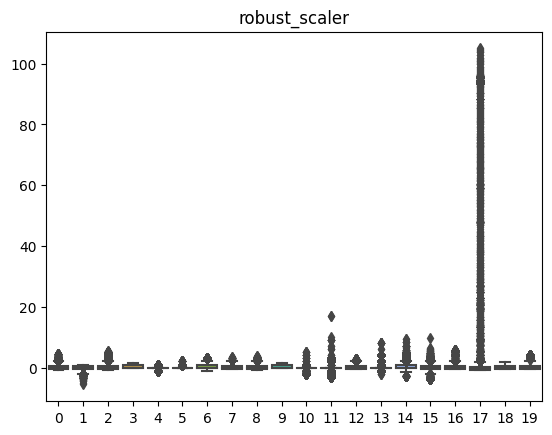

In [ ]:
sns.boxplot(data=robust_fit_transform)
plt.title('robust_scaler')

Text(0.5, 1.0, 'min_max_scaler')

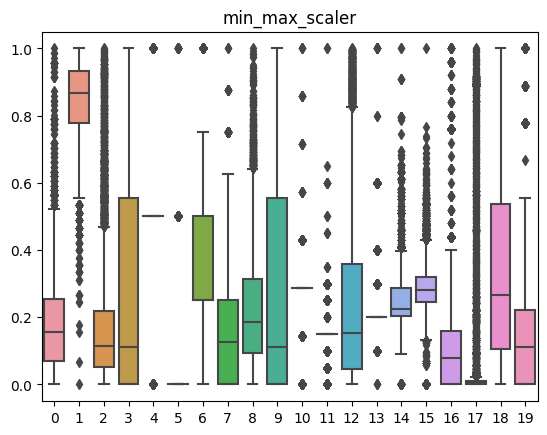

In [ ]:
sns.boxplot(data=minmax_fit_transform)
plt.title('min_max_scaler')

Text(0.5, 1.0, 'standard_fit_transform')

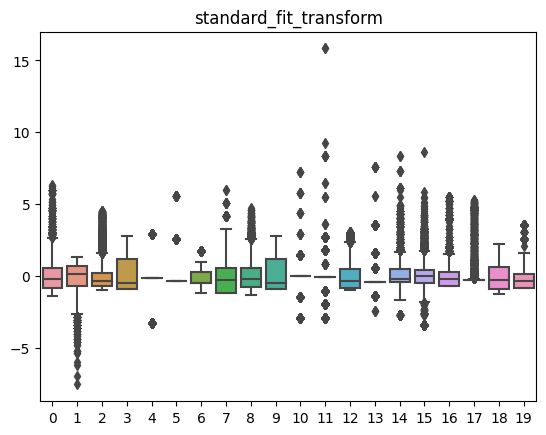

In [ ]:
sns.boxplot(data=standard_fit_transform)
plt.title('standard_fit_transform')

In [ ]:
# standard is the best
standard_scaler = preprocessing.StandardScaler()
X_train_scalar = standard_scaler.fit_transform(X_train)
# y_train_scalar = standard_scaler.fit_transform(y_train)
X_test_scalar = standard_scaler.fit_transform(X_test)
# y_test_scalar = standard_scaler.fit_transform(y_test)
print(X_train_scalar.shape,X_test_scalar.shape)

(12931, 20) (3233, 20)


# Train model with default parameter

In [ ]:
# # model
# LinearRegression
# Ridge
# QuantileRegressor
# Lasso
# ElasticNet
# PLSRegression
# PoissonRegressor
# SVR
# DecisionTreeRegressor
# RandomForestRegressor
# MLPRegressor

## LinearRegression

In [ ]:
model = LinearRegression()
kfold = model_selection.KFold(n_splits=10)
model.fit(X_train_scalar, y_train)
scores = model_selection.cross_val_score(model, X_train_scalar, y_train, cv=kfold,scoring='r2')
y_pred_model =model.predict(X_test_scalar)
# mse
mse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=True))
# rmse
rmse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=False))
#r2
r2_metric = r2_score(y_test, y_pred_model)
# mae
mae_metric = mean_absolute_error(y_test, y_pred_model)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("mse_metric","==",mse_metric)
print("rmse_metric","==",rmse_metric)
print("r2_metric","==",r2_metric)
print("mae_metric","==",mae_metric)

scores: .0.477408 +/- .0.046670
mse_metric == 24074.42053938017
rmse_metric == 155.15933919484246
r2_metric == 0.47161622588169494
mae_metric == 13391.048316186316


## Ridge

In [ ]:
model = Ridge()
kfold = model_selection.KFold(n_splits=10)
model.fit(X_train_scalar, y_train)
scores = model_selection.cross_val_score(model, X_train_scalar, y_train, cv=kfold,scoring='r2')
y_pred_model =model.predict(X_test_scalar)
# mse
mse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=True))
# rmse
rmse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=False))
#r2
r2_metric = r2_score(y_test, y_pred_model)
# mae
mae_metric = mean_absolute_error(y_test, y_pred_model)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("mse_metric","==",mse_metric)
print("rmse_metric","==",rmse_metric)
print("r2_metric","==",r2_metric)
print("mae_metric","==",mae_metric)

scores: .0.477415 +/- .0.046674
mse_metric == 24074.436956746184
rmse_metric == 155.1593920996927
r2_metric == 0.47161550522694373
mae_metric == 13390.611113954563


## Lasso

In [ ]:
model = Lasso()
kfold = model_selection.KFold(n_splits=10)
model.fit(X_train_scalar, y_train)
scores = model_selection.cross_val_score(model, X_train_scalar, y_train, cv=kfold,scoring='r2')
y_pred_model =model.predict(X_test_scalar)
# mse
mse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=True))
# rmse
rmse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=False))
#r2
r2_metric = r2_score(y_test, y_pred_model)
# mae
mae_metric = mean_absolute_error(y_test, y_pred_model)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("mse_metric","==",mse_metric)
print("rmse_metric","==",rmse_metric)
print("r2_metric","==",r2_metric)
print("mae_metric","==",mae_metric)

scores: .0.477414 +/- .0.046671
mse_metric == 24074.41466222069
rmse_metric == 155.15932025573161
r2_metric == 0.47161648386467103
mae_metric == 13390.732873229555


## ElasticNet

In [ ]:
model = ElasticNet()
kfold = model_selection.KFold(n_splits=10)
model.fit(X_train_scalar, y_train)
scores = model_selection.cross_val_score(model, X_train_scalar, y_train, cv=kfold,scoring='r2')
y_pred_model =model.predict(X_test_scalar)
# mse
mse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=True))
# rmse
rmse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=False))
#r2
r2_metric = r2_score(y_test, y_pred_model)
# mae
mae_metric = mean_absolute_error(y_test, y_pred_model)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("mse_metric","==",mse_metric)
print("rmse_metric","==",rmse_metric)
print("r2_metric","==",r2_metric)
print("mae_metric","==",mae_metric)

scores: .0.446202 +/- .0.043419
mse_metric == 24809.02917971698
rmse_metric == 157.50882254564974
r2_metric == 0.43887796040874316
mae_metric == 12897.348387217935


## PLSRegression

In [ ]:
model = PLSRegression()
kfold = model_selection.KFold(n_splits=10)
model.fit(X_train_scalar, y_train)
scores = model_selection.cross_val_score(model, X_train_scalar, y_train, cv=kfold,scoring='r2')
y_pred_model =model.predict(X_test_scalar)
# mse
mse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=True))
# rmse
rmse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=False))
#r2
r2_metric = r2_score(y_test, y_pred_model)
# mae
mae_metric = mean_absolute_error(y_test, y_pred_model)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("mse_metric","==",mse_metric)
print("rmse_metric","==",rmse_metric)
print("r2_metric","==",r2_metric)
print("mae_metric","==",mae_metric)

scores: .0.460452 +/- .0.044640
mse_metric == 24542.20614584463
rmse_metric == 156.65952299762893
r2_metric == 0.45088287662343585
mae_metric == 13614.152553396727


## PoissonRegressor

In [ ]:
model = PoissonRegressor()
kfold = model_selection.KFold(n_splits=10)
model.fit(X_train_scalar, y_train)
scores = model_selection.cross_val_score(model, X_train_scalar, y_train, cv=kfold,scoring='r2')
y_pred_model =model.predict(X_test_scalar)
# mse
mse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=True))
# rmse
rmse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=False))
#r2
r2_metric = r2_score(y_test, y_pred_model)
# mae
mae_metric = mean_absolute_error(y_test, y_pred_model)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("mse_metric","==",mse_metric)
print("rmse_metric","==",rmse_metric)
print("r2_metric","==",r2_metric)
print("mae_metric","==",mae_metric)

scores: .0.586204 +/- .0.059485
mse_metric == 20876.20149644669
rmse_metric == 144.4859906580797
r2_metric == 0.6026797067720375
mae_metric == 10866.834883670484


## SVR

In [ ]:
model = SVR()
kfold = model_selection.KFold(n_splits=10)
model.fit(X_train_scalar, y_train)
scores = model_selection.cross_val_score(model, X_train_scalar, y_train, cv=kfold,scoring='r2')
y_pred_model =model.predict(X_test_scalar)
# mse
mse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=True))
# rmse
rmse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=False))
#r2
r2_metric = r2_score(y_test, y_pred_model)
# mae
mae_metric = mean_absolute_error(y_test, y_pred_model)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("mse_metric","==",mse_metric)
print("rmse_metric","==",rmse_metric)
print("r2_metric","==",r2_metric)
print("mae_metric","==",mae_metric)

scores: .-0.042064 +/- .0.006852
mse_metric == 33787.70723436241
rmse_metric == 183.8143281530643
r2_metric == -0.040771118890132296
mae_metric == 17786.788425036313


## DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()
kfold = model_selection.KFold(n_splits=10)
model.fit(X_train_scalar, y_train)
scores = model_selection.cross_val_score(model, X_train_scalar, y_train, cv=kfold,scoring='r2')
y_pred_model =model.predict(X_test_scalar)
# mse
mse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=True))
# rmse
rmse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=False))
#r2
r2_metric = r2_score(y_test, y_pred_model)
# mae
mae_metric = mean_absolute_error(y_test, y_pred_model)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("mse_metric","==",mse_metric)
print("rmse_metric","==",rmse_metric)
print("r2_metric","==",r2_metric)
print("mae_metric","==",mae_metric)

scores: .0.652612 +/- .0.085267
mse_metric == 20750.177119334698
rmse_metric == 144.04921769775322
r2_metric == 0.6074622728259265
mae_metric == 7906.088462728117


## MLPRegressor

In [ ]:
model = MLPRegressor()
kfold = model_selection.KFold(n_splits=10)
model.fit(X_train_scalar, y_train)
scores = model_selection.cross_val_score(model, X_train_scalar, y_train, cv=kfold,scoring='r2')
y_pred_model =model.predict(X_test_scalar)
# mse
mse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=True))
# rmse
rmse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=False))
#r2
r2_metric = r2_score(y_test, y_pred_model)
# mae
mae_metric = mean_absolute_error(y_test, y_pred_model)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("mse_metric","==",mse_metric)
print("rmse_metric","==",rmse_metric)
print("r2_metric","==",r2_metric)
print("mae_metric","==",mae_metric)

scores: .0.409289 +/- .0.063737
mse_metric == 24454.346393229076
rmse_metric == 156.3788553265085
r2_metric == 0.4548074575332093
mae_metric == 13602.849597894194


In [ ]:
LinearRegression
scores: .0.477408 +/- .0.046670
mse_metric == 24074.42053938017
rmse_metric == 155.15933919484246
r2_metric == 0.47161622588169494
mae_metric == 13391.048316186316

Ridge
scores: .0.477415 +/- .0.046674
mse_metric == 24074.436956746184
rmse_metric == 155.1593920996927
r2_metric == 0.47161550522694373
mae_metric == 13390.611113954563

Lasso
scores: .0.477414 +/- .0.046671
mse_metric == 24074.41466222069
rmse_metric == 155.15932025573161
r2_metric == 0.47161648386467103
mae_metric == 13390.732873229555

ElasticNet
scores: .0.446202 +/- .0.043419
mse_metric == 24809.02917971698
rmse_metric == 157.50882254564974
r2_metric == 0.43887796040874316
mae_metric == 12897.348387217935

PLSRegression
scores: .0.460452 +/- .0.044640
mse_metric == 24542.20614584463
rmse_metric == 156.65952299762893
r2_metric == 0.45088287662343585
mae_metric == 13614.152553396727

PoissonRegressor
scores: .0.586204 +/- .0.059485
mse_metric == 20876.20149644669
rmse_metric == 144.4859906580797
r2_metric == 0.6026797067720375
mae_metric == 10866.834883670484

SVR
scores: .-0.042064 +/- .0.006852
mse_metric == 33787.70723436241
rmse_metric == 183.8143281530643
r2_metric == -0.040771118890132296
mae_metric == 17786.788425036313

DecisionTreeRegressor
scores: .0.652612 +/- .0.085267
mse_metric == 20750.177119334698
rmse_metric == 144.04921769775322
r2_metric == 0.6074622728259265
mae_metric == 7906.088462728117

MLPRegressor
scores: .0.409289 +/- .0.063737
mse_metric == 24454.346393229076
rmse_metric == 156.3788553265085
r2_metric == 0.4548074575332093
mae_metric == 13602.849597894194

RandomForestRegressor
scores: .0.827022 +/- .0.053084
mse_metric == 13988.593826074844
rmse_metric == 118.2733859584431
r2_metric == 0.821603673344017
mae_metric == 5479.047004448175

GradientBoostingRegressor
scores: .0.781258 +/- .0.042901
mse_metric == 15874.372369490397
rmse_metric == 125.99354098322023
r2_metric == 0.7702630165846776
mae_metric == 7697.6747879776085

## RandomForestRegressor

In [ ]:
model = RandomForestRegressor()
kfold = model_selection.KFold(n_splits=10)
model.fit(X_train_scalar, y_train)
scores = model_selection.cross_val_score(model, X_train_scalar, y_train, cv=kfold,scoring='r2')
y_pred_model =model.predict(X_test_scalar)
# mse
mse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=True))
# rmse
rmse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=False))
#r2
r2_metric = r2_score(y_test, y_pred_model)
# mae
mae_metric = mean_absolute_error(y_test, y_pred_model)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("mse_metric","==",mse_metric)
print("rmse_metric","==",rmse_metric)
print("r2_metric","==",r2_metric)
print("mae_metric","==",mae_metric)

scores: .0.827022 +/- .0.053084
mse_metric == 13988.593826074844
rmse_metric == 118.2733859584431
r2_metric == 0.821603673344017
mae_metric == 5479.047004448175


In [ ]:
# RandomForestRegressor(n_estimators = 1000)
# scores: .0.840368 +/- .0.051249
# mse_metric == 14136.119336785308
# rmse_metric == 118.89541343880893
# r2_metric == 0.8133791796626365
# mae_metric == 5861.068797130756

## GradientBoostingRegressor

In [ ]:
model = GradientBoostingRegressor()
kfold = model_selection.KFold(n_splits=10)
model.fit(X_train_scalar, y_train)
scores = model_selection.cross_val_score(model, X_train_scalar, y_train, cv=kfold,scoring='r2')
y_pred_model =model.predict(X_test_scalar)
# mse
mse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=True))
# rmse
rmse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=False))
#r2
r2_metric = r2_score(y_test, y_pred_model)
# mae
mae_metric = mean_absolute_error(y_test, y_pred_model)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("mse_metric","==",mse_metric)
print("rmse_metric","==",rmse_metric)
print("r2_metric","==",r2_metric)
print("mae_metric","==",mae_metric)

scores: .0.781258 +/- .0.042901
mse_metric == 15874.372369490397
rmse_metric == 125.99354098322023
r2_metric == 0.7702630165846776
mae_metric == 7697.6747879776085


In [ ]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

print(sp_randInt(100, 1000))
print(sp_randFloat())

In [ ]:
model = GradientBoostingRegressor()
parameters = {'learning_rate': sp_randFloat(),
                'subsample'    : sp_randFloat(),
                'n_estimators' : sp_randInt(100, 1000),
                'max_depth'    : sp_randInt(4, 10)
}
print(parameters)

 Results from Random Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.08262901529242839, max_depth=5,
                          n_estimators=309, subsample=0.7624629653526539)

 The best score across ALL searched params:
 0.8277173382172653

 The best parameters across ALL searched params:
 {'learning_rate': 0.08262901529242839, 'max_depth': 5, 'n_estimators': 309, 'subsample': 0.7624629653526539}


In [ ]:
model = GradientBoostingRegressor(learning_rate = 0.08262901529242839, max_depth = 5, n_estimators = 309, subsample = 0.7624629653526539)

kfold = model_selection.KFold(n_splits=10)
model.fit(X_train_scalar, y_train)
scores = model_selection.cross_val_score(model, X_train_scalar, y_train, cv=kfold,scoring='r2')
y_pred_model =model.predict(X_test_scalar)
# mse
mse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=True))
# rmse
rmse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=False))
#r2
r2_metric = r2_score(y_test, y_pred_model)
# mae
mae_metric = mean_absolute_error(y_test, y_pred_model)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("mse_metric","==",mse_metric)
print("rmse_metric","==",rmse_metric)
print("r2_metric","==",r2_metric)
print("mae_metric","==",mae_metric)

scores: .0.857936 +/- .0.037315
mse_metric == 14450.482590946898
rmse_metric == 120.21016009866595
r2_metric == 0.8049866284825673
mae_metric == 6790.652287270763


In [ ]:
model = GradientBoostingRegressor(learning_rate = 0.08262901529242839, max_depth = 5, n_estimators = 309, subsample = 0.7624629653526539)

kfold = model_selection.KFold(n_splits=10)
model.fit(X_train_scalar, y_train)
scores = model_selection.cross_val_score(model, X_train_scalar, y_train, cv=kfold,scoring='r2')
y_pred_model =model.predict(X_test_scalar)
# mse
mse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=True))
# rmse
rmse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=False))
#r2
r2_metric = r2_score(y_test, y_pred_model)
# mae
mae_metric = mean_absolute_error(y_test, y_pred_model)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("mse_metric","==",mse_metric)
print("rmse_metric","==",rmse_metric)
print("r2_metric","==",r2_metric)
print("mae_metric","==",mae_metric)

scores: .0.857099 +/- .0.043249
mse_metric == 14956.557277321688
rmse_metric == 122.29700436773457
r2_metric == 0.7910882026616766
mae_metric == 6995.062673522214


# Export model

In [ ]:
# the best model
the_best_model = GradientBoostingRegressor(learning_rate = 0.08262901529242839, max_depth = 5, n_estimators = 309, subsample = 0.7624629653526539)
kfold = model_selection.KFold(n_splits=10)
the_best_model.fit(X_train_scalar, y_train)
scores = model_selection.cross_val_score(the_best_model, X_train_scalar, y_train, cv=kfold,scoring='r2')
y_pred_model =the_best_model.predict(X_test_scalar)
# mse
mse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=True))
# rmse
rmse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=False))
#r2
r2_metric = r2_score(y_test, y_pred_model)
# mae
mae_metric = mean_absolute_error(y_test, y_pred_model)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("mse_metric","==",mse_metric)
print("rmse_metric","==",rmse_metric)
print("r2_metric","==",r2_metric)
print("mae_metric","==",mae_metric)

scores: .0.856988 +/- .0.042805
mse_metric == 14639.76939442217
rmse_metric == 120.99491474612547
r2_metric == 0.7998442088989728
mae_metric == 6826.62095704389


In [ ]:
the_best_model = GradientBoostingRegressor(learning_rate = 0.08262901529242839, max_depth = 5, n_estimators = 309, subsample = 0.7624629653526539)
kfold = model_selection.KFold(n_splits=10)
the_best_model.fit(X_train_scalar, y_train)
scores = model_selection.cross_val_score(the_best_model, X_train_scalar, y_train, cv=kfold,scoring='r2')
y_pred_model =the_best_model.predict(X_test_scalar)
# mse
mse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=True))
# rmse
rmse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=False))
#r2
r2_metric = r2_score(y_test, y_pred_model)
# mae
mae_metric = mean_absolute_error(y_test, y_pred_model)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("mse_metric","==",mse_metric)
print("rmse_metric","==",rmse_metric)
print("r2_metric","==",r2_metric)
print("mae_metric","==",mae_metric)

scores: .0.854845 +/- .0.037720
mse_metric == 15291.922636378187
rmse_metric == 123.66051365079392
r2_metric == 0.7816144630413198
mae_metric == 7174.246078563082


In [ ]:
the_best_model

GradientBoostingRegressor(learning_rate=0.08262901529242839, max_depth=5,
                          n_estimators=309, subsample=0.7624629653526539)

# clean data in one line

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
# from feature_engine.imputation import CategoricalImputer

# delete outlier
from sklearn.neighbors import LocalOutlierFactor

# train and tuning parameter
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score

# model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

# processing data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn import model_selection

# metrics
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error



# skip warning
import warnings
warnings.filterwarnings( action= 'ignore')


from google.colab import drive
drive.mount('/content/gdrive')

def clean_data(location_csv):

  df = pd.read_csv(f"{location_csv}")
  # delete null record
  # list_drop_record = [i for i in range(99,2392)]
  # df = df.drop(list_drop_record, axis=0).reset_index()
  # del df['index']

  # delete record data hardly reveal any important information.
  df[(df['Car/Suv'].notna()) & (df['BodyType'].isna())]
  values_to_remove = ['USED Dealer ad', '02 **** ****\n', '08 **** ****\n', '03 **** ****\n', '07 **** ****\n']
  mask = ~df['Car/Suv'].isin(values_to_remove)
  df = df[mask]

  df = df[~((df['Car/Suv'].isna()) & (df['BodyType'].isna()))] # delete useless record
  df = df.reset_index()
  del df['index']

  # change float to integer
  df['Year'] = df['Year'].map(lambda x : int(x))

  # clean Car/Suv
  for i in range(len(df)):
    if (pd.isna(df['Car/Suv'][i])):
      df['Car/Suv'][i] = df['BodyType'][i]
    elif "NEW Available to order":
      df['Car/Suv'][i] = df['BodyType'][i]

  # clean location
  for i in range(len(df)):
    if (pd.isna(df['Location'][i])):
      df['Location'][i] = 'unknown province, unknown state'

  # clean object to integer
  # Price
  list_price = df['Price'].tolist()
  temp_price = []
  for i in range(len(list_price)):
    try:
      temp_price.append(int(list_price[i]))
    except:
      temp_price.append(np.nan)
  df['Price'] = temp_price

  # Doors
  df['Doors'] = df['Doors'].map(lambda x : x if (pd.isna(x)) else int(x.split(" ")[1]))
  # Seats
  df['Seats'] = df['Seats'].map(lambda x : x if (pd.isna(x)) else int(x.split(" ")[1]))


  # clean seperate column
  # i investigate that we can clean Title column after Model word column
  # Title columns
  list_extra_word = []
  list_title = df['Title'].tolist()
  list_model = df['Model'].tolist()
  for i in range(len(df)):
      list_extra_word.append(list_title[i].split(f'{list_model[i]} ')[-1:][0])
  df['extra_word'] = list_extra_word

  del df['Title']

  # engine column
  list_engine_capacity = []
  list_engine_power = []
  list_engine_column = df['Engine'].tolist()
  for i in range(len(list_engine_column)):
    if '-' == list_engine_column[i]:
      list_engine_capacity.append(np.nan)
      list_engine_power.append(np.nan)
    elif 'cyl' in list_engine_column[i] and 'L' in list_engine_column[i]:
      list_engine_capacity.append(int(list_engine_column[i].split(" cyl, ")[0]))
      list_engine_power.append(float(list_engine_column[i].split(" cyl, ")[1].split(" L")[0]))
    elif 'L' in list_engine_column[i]:
      list_engine_capacity.append(np.nan)
      list_engine_power.append(float(list_engine_column[i].split(' L')[0]))
    elif 'cyl' in list_engine_column[i]:
      list_engine_capacity.append(int(list_engine_column[i].split(' cyl')[0]))
      list_engine_power.append(np.nan)
  df['engine_capacity'] = list_engine_capacity
  df['engine_power'] = list_engine_power
  del df['Engine']
  del df['CylindersinEngine']

  # FuelConsumption
  df['fuel_consumption_rate'] = df['FuelConsumption'].map(lambda x : x.split(' L')[0]).map(lambda x : x if x == '-' else float(x))
  df['fuel_consumption_kilometres'] = df['FuelConsumption'].map(lambda x : x[-6:-3] if (len(x)>=2) else x)
  df['fuel_consumption_kilometres'].unique().tolist()
  del df['FuelConsumption']
  del df['fuel_consumption_kilometres']
  df.loc[df['fuel_consumption_rate'] == "-", ['fuel_consumption_rate']] = np.nan

  # ColourExtInt
  df['colour_exterior'] = df['ColourExtInt'].map(lambda x : x.split(' / ')[0])
  df['colour_interior'] = df['ColourExtInt'].map(lambda x : x.split(' / ')[1])
  del df['ColourExtInt']

  # location
  df['location_province'] = df['Location'].map(lambda x : x.split(', ')[0])
  df['location_state'] = df['Location'].map(lambda x : x.split(', ')[1])

  del df['Location']

  # clean object to integer



  df.loc[(df['Kilometres'] == "-") | (df['Kilometres'] == "- / -"), ['Kilometres']] = np.nan
  ct = ColumnTransformer(
      [("median_imp", SimpleImputer(strategy = 'median'), ['Doors','Seats','Price', 'engine_capacity','engine_power', 'fuel_consumption_rate', 'Kilometres'])])
  df[['Doors','Seats','Price', 'engine_capacity','engine_power', 'fuel_consumption_rate', 'Kilometres']] = ct.fit_transform(df)

  # replace object to number by dictionary
  list_replace_column = ["Brand","Model","Car/Suv","UsedOrNew","Transmission","DriveType","FuelType","BodyType","extra_word","colour_exterior","colour_interior","location_province","location_state"]
  for i in range(len(list_replace_column)):
    unique_column_dict = {}
    list_unique_brand = df[f'{list_replace_column[i]}'].unique()
    for j in range(len(list_unique_brand)):
      unique_column_dict[list_unique_brand[j]] = j
    # print(unique_column_dict)
    df = df.replace({f'{list_replace_column[i]}': unique_column_dict})

  # delete outlier
  OutlierFactor = LocalOutlierFactor()
  predict_outlier = OutlierFactor.fit_predict(df)
  # print(predict_outlier)
  df['check_outlier'] = predict_outlier.tolist()
  df = df[df['check_outlier'] == 1].reset_index(drop=True).drop(['check_outlier'], axis=1)

  df.to_csv("/content/gdrive/MyDrive/test/test_third/clean_datav3.csv")
  # train test split
  features = ['Brand', 'Year', 'Model', 'Car/Suv', 'UsedOrNew', 'Transmission',
        'DriveType', 'FuelType', 'Kilometres', 'BodyType', 'Doors', 'Seats', 'extra_word', 'engine_capacity', 'engine_power',
        'fuel_consumption_rate', 'colour_exterior', 'colour_interior',
        'location_province', 'location_state']
  X = df.loc[:, features].to_numpy()
  y = df.loc[:, 'Price'].to_numpy()

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
  X_train.shape, X_test.shape, y_train.shape, y_test.shape

  standard_scaler = preprocessing.StandardScaler()
  standard_fit_transform = standard_scaler.fit_transform(X_train)

  # standard is the best
  standard_scaler = preprocessing.StandardScaler()
  X_train_scalar = standard_scaler.fit_transform(X_train)
  # y_train_scalar = standard_scaler.fit_transform(y_train)
  X_test_scalar = standard_scaler.fit_transform(X_test)
  # y_test_scalar = standard_scaler.fit_transform(y_test)
  # print(X_train_scalar.shape,X_test_scalar.shape)


  return X_train_scalar, X_test_scalar, y_train, y_test
X_train_scalar, X_test_scalar, y_train, y_test = clean_data("/content/gdrive/MyDrive/test/test_third/Full Dataset Australian Vehicle Prices Assessment 2 2023 T3.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# X_train_scalar

In [ ]:
import pandas as pd
df_clean_data = pd.read_csv("/content/gdrive/MyDrive/test/test_third/clean_datav2.csv")
df_clean_data.info()
df_clean_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             16164 non-null  int64  
 1   Brand                  16164 non-null  int64  
 2   Year                   16164 non-null  int64  
 3   Model                  16164 non-null  int64  
 4   Car/Suv                16164 non-null  int64  
 5   UsedOrNew              16164 non-null  int64  
 6   Transmission           16164 non-null  int64  
 7   DriveType              16164 non-null  int64  
 8   FuelType               16164 non-null  int64  
 9   Kilometres             16164 non-null  float64
 10  BodyType               16164 non-null  int64  
 11  Doors                  16164 non-null  float64
 12  Seats                  16164 non-null  float64
 13  Price                  16164 non-null  float64
 14  extra_word             16164 non-null  int64  
 15  en

,Unnamed: 0,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,...,Seats,Price,extra_word,engine_capacity,engine_power,fuel_consumption_rate,colour_exterior,colour_interior,location_province,location_state
0,0,0,2022,0,0,0,0,0,0,5595.0,...,7.0,51990.0,0,4.0,2.2,8.7,0,0,0,0
1,1,1,2022,1,1,1,0,1,1,16.0,...,5.0,19990.0,1,4.0,1.5,6.7,1,0,1,0
2,2,2,2022,2,2,1,0,2,1,8472.0,...,4.0,108988.0,2,4.0,2.0,6.6,2,1,2,0
3,3,3,2011,3,2,1,0,2,1,136517.0,...,4.0,32990.0,3,8.0,5.5,11.0,0,2,3,0
4,4,4,2022,4,0,1,0,1,2,1035.0,...,5.0,34990.0,4,4.0,1.3,6.0,2,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16159,16159,7,2021,22,0,1,0,1,2,32977.0,...,5.0,36770.0,368,4.0,2.0,6.9,0,3,309,2
16160,16160,5,2014,163,3,1,0,1,2,66000.0,...,5.0,29500.0,3723,4.0,2.2,7.6,2,3,309,2
16161,16161,23,2022,155,0,0,0,1,2,5165.0,...,5.0,35280.0,855,4.0,1.6,6.2,7,3,404,2
16162,16162,3,2016,340,0,1,0,0,1,85525.0,...,5.0,41888.0,2350,4.0,2.0,7.2,2,0,312,2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pickle
def train_and_export_model(X_train, X_test, y_train, y_test, location_export_model, model):
 # # Train model with default parameter
  kfold = model_selection.KFold(n_splits=10)
  model.fit(X_train_scalar, y_train)
  scores = model_selection.cross_val_score(model, X_train_scalar, y_train, cv=kfold,scoring='r2')
  y_pred_model =model.predict(X_test_scalar)
  # mse
  mse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=True))
  # rmse
  rmse_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model, squared=False))
  #r2
  r2_metric = r2_score(y_test, y_pred_model)
  # mae
  mae_metric = mean_absolute_error(y_test, y_pred_model)
  print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
  print("mse_metric","==",mse_metric)
  print("rmse_metric","==",rmse_metric)
  print("r2_metric","==",r2_metric)
  print("mae_metric","==",mae_metric)



  # save the iris classification model as a pickle file
  model_pkl_file = f"{location_export_model}"

  with open(model_pkl_file, 'wb') as file:
      pickle.dump(model, file)

train_and_export_model(X_train_scalar, X_test_scalar, y_train, y_test, "/content/gdrive/MyDrive/test/test_third/RandomForestRegressor1000.pkl", RandomForestRegressor(n_estimators=1000))



scores: .0.828140 +/- .0.051256
mse_metric == 13992.190503179625
rmse_metric == 118.28858991119822
r2_metric == 0.8215119248125354
mae_metric == 5428.8493090514985


In [ ]:
import pandas as pd
import numpy as np
import pickle

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# processing data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn import model_selection

# metrics
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error



def predict_data(location_dataset,location_model_import):
  df = pd.read_csv(f"{location_dataset}")
  # df['Price'] = np.nan

  # delete null record
  # list_drop_record = [i for i in range(99,2392)]
  # df = df.drop(list_drop_record, axis=0).reset_index()
  # del df['index']

  # delete record data hardly reveal any important information.
  df[(df['Car/Suv'].notna()) & (df['BodyType'].isna())]
  values_to_remove = ['USED Dealer ad', '02 **** ****\n', '08 **** ****\n', '03 **** ****\n', '07 **** ****\n']
  mask = ~df['Car/Suv'].isin(values_to_remove)
  df = df[mask]

  df = df[~((df['Car/Suv'].isna()) & (df['BodyType'].isna()))] # delete useless record
  df = df.reset_index()
  del df['index']

  # change float to integer
  df['Year'] = df['Year'].map(lambda x : int(x))

  # clean Car/Suv
  for i in range(len(df)):
    if (pd.isna(df['Car/Suv'][i])):
      df['Car/Suv'][i] = df['BodyType'][i]
    elif "NEW Available to order":
      df['Car/Suv'][i] = df['BodyType'][i]

  # clean location
  for i in range(len(df)):
    if (pd.isna(df['Location'][i])):
      df['Location'][i] = 'unknown province, unknown state'

  # clean object to integer
  # Doors
  df['Doors'] = df['Doors'].map(lambda x : x if (pd.isna(x)) else int(x.split(" ")[1]))
  # Seats
  df['Seats'] = df['Seats'].map(lambda x : x if (pd.isna(x)) else int(x.split(" ")[1]))


  # clean seperate column
  # i investigate that we can clean Title column after Model word column
  # Title columns
  list_extra_word = []
  list_title = df['Title'].tolist()
  list_model = df['Model'].tolist()
  for i in range(len(df)):
      list_extra_word.append(list_title[i].split(f'{list_model[i]} ')[-1:][0])
  df['extra_word'] = list_extra_word

  del df['Title']

  # engine column
  list_engine_capacity = []
  list_engine_power = []
  list_engine_column = df['Engine'].tolist()
  for i in range(len(list_engine_column)):
    if '-' == list_engine_column[i]:
      list_engine_capacity.append(np.nan)
      list_engine_power.append(np.nan)
    elif 'cyl' in list_engine_column[i] and 'L' in list_engine_column[i]:
      list_engine_capacity.append(int(list_engine_column[i].split(" cyl, ")[0]))
      list_engine_power.append(float(list_engine_column[i].split(" cyl, ")[1].split(" L")[0]))
    elif 'L' in list_engine_column[i]:
      list_engine_capacity.append(np.nan)
      list_engine_power.append(float(list_engine_column[i].split(' L')[0]))
    elif 'cyl' in list_engine_column[i]:
      list_engine_capacity.append(int(list_engine_column[i].split(' cyl')[0]))
      list_engine_power.append(np.nan)
  df['engine_capacity'] = list_engine_capacity
  df['engine_power'] = list_engine_power
  del df['Engine']
  del df['CylindersinEngine']

  # FuelConsumption
  df['fuel_consumption_rate'] = df['FuelConsumption'].map(lambda x : x.split(' L')[0]).map(lambda x : x if x == '-' else float(x))
  df['fuel_consumption_kilometres'] = df['FuelConsumption'].map(lambda x : x[-6:-3] if (len(x)>=2) else x)
  df['fuel_consumption_kilometres'].unique().tolist()
  del df['FuelConsumption']
  del df['fuel_consumption_kilometres']
  df.loc[df['fuel_consumption_rate'] == "-", ['fuel_consumption_rate']] = np.nan

  # ColourExtInt
  df['colour_exterior'] = df['ColourExtInt'].map(lambda x : x.split(' / ')[0])
  df['colour_interior'] = df['ColourExtInt'].map(lambda x : x.split(' / ')[1])
  del df['ColourExtInt']

  # location
  df['location_province'] = df['Location'].map(lambda x : x.split(', ')[0])
  df['location_state'] = df['Location'].map(lambda x : x.split(', ')[1])

  del df['Location']

  # clean object to integer
  # del df['index']



  df.loc[(df['Kilometres'] == "-") | (df['Kilometres'] == "- / -"), ['Kilometres']] = np.nan
  ct = ColumnTransformer(
      [("median_imp", SimpleImputer(strategy = 'median'), ['Doors','Seats', 'engine_capacity','engine_power', 'fuel_consumption_rate', 'Kilometres'])])
  df[['Doors','Seats', 'engine_capacity','engine_power', 'fuel_consumption_rate', 'Kilometres']] = ct.fit_transform(df)

  # replace object to number by dictionary
  list_replace_column = ["Brand","Model","Car/Suv","UsedOrNew","Transmission","DriveType","FuelType","BodyType","extra_word","colour_exterior","colour_interior","location_province","location_state"]
  for i in range(len(list_replace_column)):
    unique_column_dict = {}
    list_unique_brand = df[f'{list_replace_column[i]}'].unique()
    for j in range(len(list_unique_brand)):
      unique_column_dict[list_unique_brand[j]] = j
    # print(unique_column_dict)
    df = df.replace({f'{list_replace_column[i]}': unique_column_dict})

  standard_scaler = preprocessing.StandardScaler()

  features = ['Brand', 'Year', 'Model', 'Car/Suv', 'UsedOrNew', 'Transmission',
        'DriveType', 'FuelType', 'Kilometres', 'BodyType', 'Doors', 'Seats', 'extra_word', 'engine_capacity', 'engine_power',
        'fuel_consumption_rate', 'colour_exterior', 'colour_interior',
        'location_province', 'location_state']
  X_test_predict = df.loc[:, features].to_numpy()

  standard_scaler = preprocessing.StandardScaler()

  X_test_predict_scalar = standard_scaler.fit_transform(X_test_predict)

  with open(f"{location_model_import}", 'rb') as file:
    model = pickle.load(file)

  # evaluate model
  y_pred_model = model.predict(X_test_predict_scalar)

  df['predict_price'] = y_pred_model.tolist()
  return df
df_predict = predict_data("/content/gdrive/MyDrive/test/test_third/Full Dataset Australian Vehicle Prices Assessment 2 2023 T3.csv","/content/gdrive/MyDrive/test/test_third/RandomForestRegressor1000.pkl")
# df_predict[['Price','predict_price']]
df_predict

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,BodyType,...,Price,extra_word,engine_capacity,engine_power,fuel_consumption_rate,colour_exterior,colour_interior,location_province,location_state,predict_price
0,0,2022,0,0,0,0,0,0,5595.0,0,...,51990,0,4.0,2.2,8.7,0,0,0,0,55523.378000
1,1,2022,1,1,1,0,1,1,16.0,1,...,19990,1,4.0,1.5,6.7,1,0,1,0,20216.680667
2,2,2022,2,2,1,0,2,1,8472.0,2,...,108988,2,4.0,2.0,6.6,2,1,2,0,68289.260000
3,3,2011,3,2,1,0,2,1,136517.0,2,...,32990,3,8.0,5.5,11.0,0,2,3,0,36051.410000
4,4,2022,4,0,1,0,1,2,1035.0,0,...,34990,4,4.0,1.3,6.0,2,0,4,0,37556.178000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16301,7,2021,22,0,1,0,1,2,32977.0,0,...,36770,368,4.0,2.0,6.9,0,3,309,2,35527.042000
16302,5,2014,163,3,1,0,1,2,66000.0,3,...,29500,3723,4.0,2.2,7.6,2,3,309,2,29050.512000
16303,23,2022,155,0,0,0,1,2,5165.0,0,...,35280,855,4.0,1.6,6.2,7,3,404,2,35417.924000
16304,3,2016,340,0,1,0,0,1,85525.0,0,...,41888,2350,4.0,2.0,7.2,2,0,312,2,42650.049000


In [ ]:
# df = {}
len(["Ssangyong", "MG", "BMW", "Mercedes-Benz", "Renault", "Toyota", "Land", "Nissan", "Honda"]), len([2022, 2022, 2022, 2011, 2022, 2004, 2017, 2000, 2013, 2014])

(9, 10)

In [ ]:
test_data = {
  "Brand": ["Ssangyong", "MG", "BMW", "Mercedes-Benz", "Renault", "Toyota", "Land", "Nissan", "Toyota", "Honda"],
  "Year": [2022, 2022, 2022, 2011, 2022, 2004, 2017, 2000, 2013, 2014],
  "Model": ["Rexton", "MG3", "430I", "E500", "Arkana", "Estima", "Rover", "Pulsar", "86", "Jazz"],
  "Car/Suv": ["Sutherland Isuzu Ute", "Hatchback", "Coupe", "Coupe", "SUV", "ON FOUR WHEELS", "SUV", "Hatchback", "Coupe", "Hatchback"],
  "Title": [
    "2022 Ssangyong Rexton Ultimate (awd)",
    "2022 MG MG3 Auto Excite (with Navigation)",
    "2022 BMW 430I M Sport",
    "2011 Mercedes-Benz E500 Elegance",
    "2022 Renault Arkana Intens",
    "2004 Toyota Estima T EDITION",
    "2017 Land Rover Range Rover Evoque TD4 180 HSE Dynamic",
    "2000 Nissan Pulsar LX",
    "2013 Toyota 86 GT",
    "2014 Honda Jazz Hybrid"
  ],
  "UsedOrNew": ["DEMO", "USED", "USED", "USED", "USED", "USED", "USED", "USED", "USED", "USED"],
  "Transmission": ["Automatic", "Automatic", "Automatic", "Automatic", "Automatic", "Automatic", "Automatic", "Automatic", "Automatic", "Automatic"],
  "Engine": ["4 cyl, 2.2 L", "4 cyl, 1.5 L", "4 cyl, 2 L", "8 cyl, 5.5 L", "4 cyl, 1.3 L", "-", "4 cyl, 2 L", "4 cyl, 1.6 L", "4 cyl, 2 L", "4 cyl, 1.3 L"],
  "DriveType": ["AWD", "Front", "Rear", "Rear", "Front", "Other", "AWD", "Front", "Rear", "Front"],
  "FuelType": ["Diesel", "Premium", "Premium", "Premium", "Unleaded", "Unleaded", "Diesel", "Unleaded", "Premium", "Hybrid"],
  "FuelConsumption": ["8.7 L / 100 km", "6.7 L / 100 km", "6.6 L / 100 km", "11 L / 100 km", "6 L / 100 km", "-", "5.1 L / 100 km", "8 L / 100 km", "7.1 L / 100 km", "4.5 L / 100 km"],
  "Kilometres": [5595, 16, 8472, 136517, 1035, 160230, 67662, 300539, 82012, 38229],
  "ColourExtInt": ["White / Black", "Black / Black", "Grey / White", "White / Brown", "Grey / Black", "Grey / -", "White / Black", "Red / Grey", "Black / -", "Blue / -"],
  "Location": ["Caringbah, NSW", "Brookvale, NSW", "Sylvania, NSW", "Mount Druitt, NSW", "Castle Hill, NSW", "Saint Marys, NSW", "Blacktown, NSW", "Wentworthville, NSW", "Mcgraths Hill, NSW", "Lidcombe, NSW"],
  "CylindersinEngine": ["4 cyl", "4 cyl", "4 cyl", "8 cyl", "4 cyl", "-", "4 cyl", "4 cyl", "4 cyl", "4 cyl"],
  "BodyType": ["SUV", "Hatchback", "Coupe", "Coupe", "SUV", "Commercial", "SUV", "Hatchback", "Coupe", "Hatchback"],
  "Doors": [" 4 Doors", " 5 Doors", " 2 Doors", " 2 Doors", " 4 Doors", np.nan, " 2 Doors", " 5 Doors", " 2 Doors", " 5 Doors"],
  "Seats": [" 7 Seats", " 5 Seats", " 4 Seats", " 4 Seats", " 5 Seats", np.nan, " 4 Seats", " 5 Seats", " 4 Seats", " 5 Seats"],
  "Price": [51990, 19990, 108988, 32990, 34990, 9990, 62280, 2995, 24888, 17900]
}
test = pd.DataFrame(test_data)
test.info()
test

# test.to_csv("/content/gdrive/MyDrive/test/test_third/test_filev4")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              10 non-null     object
 1   Year               10 non-null     int64 
 2   Model              10 non-null     object
 3   Car/Suv            10 non-null     object
 4   Title              10 non-null     object
 5   UsedOrNew          10 non-null     object
 6   Transmission       10 non-null     object
 7   Engine             10 non-null     object
 8   DriveType          10 non-null     object
 9   FuelType           10 non-null     object
 10  FuelConsumption    10 non-null     object
 11  Kilometres         10 non-null     int64 
 12  ColourExtInt       10 non-null     object
 13  Location           10 non-null     object
 14  CylindersinEngine  10 non-null     object
 15  BodyType           10 non-null     object
 16  Doors              9 non-null      object
 17  

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990
5,Toyota,2004,Estima,ON FOUR WHEELS,2004 Toyota Estima T EDITION,USED,Automatic,-,Other,Unleaded,-,160230,Grey / -,"Saint Marys, NSW",-,Commercial,NaN,NaN,9990
6,Land,2017,Rover,SUV,2017 Land Rover Range Rover Evoque TD4 180 HSE...,USED,Automatic,"4 cyl, 2 L",AWD,Diesel,5.1 L / 100 km,67662,White / Black,"Blacktown, NSW",4 cyl,SUV,2 Doors,4 Seats,62280
7,Nissan,2000,Pulsar,Hatchback,2000 Nissan Pulsar LX,USED,Automatic,"4 cyl, 1.6 L",Front,Unleaded,8 L / 100 km,300539,Red / Grey,"Wentworthville, NSW",4 cyl,Hatchback,5 Doors,5 Seats,2995
8,Toyota,2013,86,Coupe,2013 Toyota 86 GT,USED,Automatic,"4 cyl, 2 L",Rear,Premium,7.1 L / 100 km,82012,Black / -,"Mcgraths Hill, NSW",4 cyl,Coupe,2 Doors,4 Seats,24888
9,Honda,2014,Jazz,Hatchback,2014 Honda Jazz Hybrid,USED,Automatic,"4 cyl, 1.3 L",Front,Hybrid,4.5 L / 100 km,38229,Blue / -,"Lidcombe, NSW",4 cyl,Hatchback,5 Doors,5 Seats,17900


In [ ]:
df.read_csv("")

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,Toyota,2014.0,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500
16730,Mercedes-Benz,2012.0,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,-,117432,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888
16731,Suzuki,2022.0,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280
16732,Mercedes-Benz,2016.0,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/test/test_third/orca_share_media1705016862946_7151359048325525184.csv")
df['Doors'][0].split(" ")
df['Seats'][0].split(" ")

['', '7', 'Seats']

# Virtualization

In [ ]:
result_data = {
  "model": ["LinearRegression", "Ridge", "Lasso","ElasticNet","PLSRegression", "PoissonRegressor","SVR", "DecisionTreeRegressor","MLPRegressor","RandomForestRegressor","GradientBoostingRegressor"],
  "score_mean": [0.477408,0.477415,0.477414,0.446202,0.460452,0.586204,-0.042064,0.652612, 0.409289, 0.827022, 0.781258],
  "score_std":[0.046670,0.046674,0.046671,0.043419,0.044640,0.059485,0.006852,0.085267, 0.063737, 0.053084, 0.042901],
  "mse_metric": [24074.42053938017,24074.436956746184,24074.41466222069,24809.02917971698,24542.20614584463,20876.20149644669,33787.70723436241,20750.177119334698,24454.346393229076, 13988.593826074844, 15874.372369490397],
  "rmse_metric": [155.15933919484246,155.1593920996927,155.15932025573161,157.50882254564974,156.65952299762893,144.4859906580797,183.8143281530643,144.04921769775322,156.3788553265085, 118.2733859584431, 125.99354098322023],
  "r2_metric": [0.47161622588169494,0.47161550522694373,0.47161648386467103,0.43887796040874316,0.45088287662343585,0.6026797067720375,-0.040771118890132296,0.6074622728259265,0.4548074575332093, 0.821603673344017, 0.7702630165846776],
  "mae_metric": [13391.048316186316,13390.611113954563,13390.732873229555,12897.348387217935,13614.152553396727,10866.834883670484,17786.788425036313,7906.088462728117,13602.849597894194, 5479.047004448175, 7697.6747879776085]
}

result_data = pd.DataFrame(result_data)
result_data











# LinearRegression
# scores: .0.477408 +/- .0.046670
# mse_metric == 24074.42053938017
# rmse_metric == 155.15933919484246
# r2_metric == 0.47161622588169494
# mae_metric == 13391.048316186316

# Ridge
# scores: .0.477415 +/- .0.046674
# mse_metric == 24074.436956746184
# rmse_metric == 155.1593920996927
# r2_metric == 0.47161550522694373
# mae_metric == 13390.611113954563

# Lasso
# scores: .0.477414 +/- .0.046671
# mse_metric == 24074.41466222069
# rmse_metric == 155.15932025573161
# r2_metric == 0.47161648386467103
# mae_metric == 13390.732873229555

# ElasticNet
# scores: .0.446202 +/- .0.043419
# mse_metric == 24809.02917971698
# rmse_metric == 157.50882254564974
# r2_metric == 0.43887796040874316
# mae_metric == 12897.348387217935

# PLSRegression
# scores: .0.460452 +/- .0.044640
# mse_metric == 24542.20614584463
# rmse_metric == 156.65952299762893
# r2_metric == 0.45088287662343585
# mae_metric == 13614.152553396727

# PoissonRegressor
# scores: .0.586204 +/- .0.059485
# mse_metric == 20876.20149644669
# rmse_metric == 144.4859906580797
# r2_metric == 0.6026797067720375
# mae_metric == 10866.834883670484

# SVR
# scores: .-0.042064 +/- .0.006852
# mse_metric == 33787.70723436241
# rmse_metric == 183.8143281530643
# r2_metric == -0.040771118890132296
# mae_metric == 17786.788425036313

# DecisionTreeRegressor
# # scores: .0.652612 +/- .0.085267
# mse_metric == 20750.177119334698
# rmse_metric == 144.04921769775322
# r2_metric == 0.6074622728259265
# mae_metric == 7906.088462728117

# MLPRegressor
# scores: .0.409289 +/- .0.063737
# mse_metric == 24454.346393229076
# rmse_metric == 156.3788553265085
# r2_metric == 0.4548074575332093
# mae_metric == 13602.849597894194

# RandomForestRegressor
# scores: .0.827022 +/- .0.053084
# mse_metric == 13988.593826074844
# rmse_metric == 118.2733859584431
# r2_metric == 0.821603673344017
# mae_metric == 5479.047004448175

# GradientBoostingRegressor
# scores: .0.781258 +/- .0.042901
# mse_metric == 15874.372369490397
# rmse_metric == 125.99354098322023
# r2_metric == 0.7702630165846776
# mae_metric == 7697.6747879776085





,model,score_mean,score_std,mse_metric,rmse_metric,r2_metric,mae_metric
0,LinearRegression,0.477408,0.046670,24074.420539,155.159339,0.471616,13391.048316
1,Ridge,0.477415,0.046674,24074.436957,155.159392,0.471616,13390.611114
2,Lasso,0.477414,0.046671,24074.414662,155.159320,0.471616,13390.732873
3,ElasticNet,0.446202,0.043419,24809.029180,157.508823,0.438878,12897.348387
4,PLSRegression,0.460452,0.044640,24542.206146,156.659523,0.450883,13614.152553
5,PoissonRegressor,0.586204,0.059485,20876.201496,144.485991,0.602680,10866.834884
6,SVR,-0.042064,0.006852,33787.707234,183.814328,-0.040771,17786.788425
7,DecisionTreeRegressor,0.652612,0.085267,20750.177119,144.049218,0.607462,7906.088463
8,MLPRegressor,0.409289,0.063737,24454.346393,156.378855,0.454807,13602.849598
9,RandomForestRegressor,0.827022,0.053084,13988.593826,118.273386,0.821604,5479.047004


<Axes: xlabel='model', ylabel='r2_metric'>

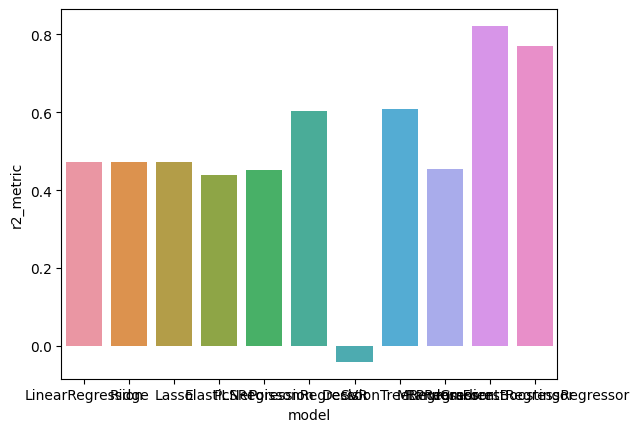

In [ ]:
# sns.barplot(result_data, x="model", y="mae_metric", hue="island", legend=False)
sns.barplot(result_data, x="model", y="r2_metric")

In [ ]:
# LinearRegression(), Ridge(), Lasso(), ElasticNet(), PLSRegression(), PoissonRegressor(), SVR(), DecisionTreeRegressor(), MLPRegressor(), RandomForestRegressor(), GradientBoostingRegressor()